# Hackathon Subject 1: Credit Card Fraud Detection and Prevention
### Description:

In this hackathon, you are tasked with analyzing a dataset focused on credit card transactions to detect fraudulent activities. As a data analyst working within a financial institution, your goal is to leverage the “Credit Card Fraud Detection” dataset to uncover patterns that distinguish between fraudulent and non-fraudulent transactions. This dataset is highly imbalanced, as fraudulent transactions are rare compared to legitimate ones. Your challenge is to apply various data analysis and machine learning techniques to accurately identify fraudulent transactions, while minimizing false positives.


The dataset includes anonymized features resulting from a PCA dimensionality reduction process to protect sensitive information. Your task will involve exploring these features, understanding their relationships, and building predictive models to enhance the institution’s fraud detection capabilities.

* Data source: Credit Card Fraud Detection - Anonymized credit card transactions labeled as fraudulent or genuine

### Key Tasks:

* Exploratory Data Analysis (EDA): Perform an in-depth analysis of the dataset to understand the distribution of variables and identify any correlations.
Explore the relationship between the Amount, Time, and the anonymized features (V1-V28) with the Class label.
Data Preprocessing:

* Handle missing values, if any, and apply normalization or standardization techniques to prepare the data for modeling.
Address the class imbalance using techniques such as oversampling, undersampling, or SMOTE (Synthetic Minority Over-sampling Technique).
Feature Engineering:

* Analyze the importance of the features (V1-V28) in predicting fraud and consider creating new features or aggregating existing ones for better model performance.
Predictive Modeling:

* Develop machine learning models to classify transactions as fraudulent or non-fraudulent. Consider using algorithms like Logistic Regression, Random Forest, XGBoost, or Neural Networks.
Evaluate the models using appropriate metrics such as accuracy, precision, recall, F1-score, and AUC-ROC curve, particularly focusing on minimizing false positives.
Visualization:

* Use Matplotlib and Seaborn to create visualizations that highlight the key findings of your analysis (you can also create them directly in PowerBI or Tableau).
Use Tableau or PowerBI to build an interactive dashboard that can be used by stakeholders to monitor fraudulent activities in real-time.
Bonus: Fraud Prevention Strategy:

* Propose a strategy for real-time fraud detection and prevention, incorporating your findings from the dataset.
Suggest additional data points or external data sources that could be integrated to enhance the accuracy of fraud detection.
Deliverables:

Participants are expected to submit a comprehensive report detailing their findings, insights, and recommendations. Additionally, a presentation should be prepared to showcase key results and strategies to a panel of judges. An interactive dashboard should be provided to demonstrate the real-time fraud detection capabilities.

### Evaluation Criteria:

Judges will assess submissions based on the depth of analysis, creativity in feature engineering, the effectiveness of the visualization techniques, and the overall impact of proposed recommendations on enhancing the institution’s fraud detection and prevention efforts.

## Cararctérisation de la fraude bancaire par carte bancaire

La fraude par carte bancaire se caractérise par un ensemble de comportements, contextes ou anomalies statistiquement rares et souvent inhabituels. D’après ton analyse et la littérature spécialisée, voici les principales caractéristiques typiques :

🔍 1. Temporalité inhabituelle
Heures à risque : entre 22h et 2h du matin

Pics de fraudes en début ou fin de journée

Spikes : plusieurs transactions en quelques secondes/minutes

🌍 2. Distance anormale
Écart important entre lieu du client et lieu du commerçant

Parfois impossible à parcourir physiquement dans le temps imparti

Fraude souvent plus élevée quand la distance dépasse un seuil

🛍️ 3. Catégories de marchands ciblées
shopping_net, misc_net, grocery_pos → les plus vulnérables

Paiements sans contact ou achats en ligne faciles à automatiser

💵 4. Montants atypiques ou arrondis
Très petits ou très gros montants

Montants ronds ou répétitifs

Montants élevés juste avant une fraude

🧑‍💼 5. Comportements démographiques anormaux
Certains profils professionnels ou âges surexposés

Zones faiblement peuplées (petites villes ou ZIP rares)

Comportement non cohérent avec l’historique de l’utilisateur

🔁 6. Répétition ou similarité suspecte
Cartes utilisées sur plusieurs commerçants dans un court délai

Marchands impliqués dans plus d'une fraude

Catégories identiques avant chaque fraude

🧠 7. Changements soudains dans le comportement
Variation brutale dans :

la fréquence,

le montant,

la localisation,

le type de marchand.



In [1]:
import pandas as pd

# Charger les fichiers
df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")

# Dimensions
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

# Premier aperçu
print("\nAperçu du train :")
print(df_train.head())

# Résumé statistique
print("\nRésumé statistique :")
print(df_train.describe())

# Répartition des classes
print("\nRépartition des classes (fraude vs non-fraude) :")
print(df_train['Class'].value_counts(normalize=True))


Train shape: (1296675, 23)
Test shape: (555719, 23)

Aperçu du train :
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.078

KeyError: 'Class'

L'erreur signifie que la colonne 'Class' n'existe pas dans ton fichier fraudTrain.csv. On va vérifier les noms exacts des colonnes.

Exécute ce code et envoie-moi la sortie complète :

In [2]:
# Affiche les noms de colonnes
print(df_train.columns.tolist())


['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [3]:
import pandas as pd

# Chargement des fichiers
df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")

# Dimensions
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

# Aperçu
print("\nAperçu du train :")
print(df_train.head())

# Statistiques
print("\nRésumé statistique :")
print(df_train.describe())

# Répartition des classes
print("\nRépartition des classes (fraude vs non-fraude) :")
print(df_train['is_fraud'].value_counts(normalize=True))


Train shape: (1296675, 23)
Test shape: (555719, 23)

Aperçu du train :
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.078

## Analyse rapide :

### 📊 **Dimensions**

* Train : **1 296 675** lignes, 23 colonnes
* Test : **555 719** lignes

### 🔍 **Colonnes importantes**

* `amt` : montant de la transaction
* `trans_date_trans_time` : timestamp de la transaction
* `is_fraud` : **variable cible**, très déséquilibrée

### ⚠️ **Déséquilibre des classes**

* Fraude (`is_fraud = 1`) : **0,58 %**
* Non-fraude (`is_fraud = 0`) : **99,42 %**
  ➡️ C’est **très fortement déséquilibré**, il faudra corriger ça avec SMOTE ou autre.

### 📈 **Montant (`amt`)**

* Min : 1
* Max : 28 948.90
  ➡️ Distribution probablement très étendue → à visualiser.

---

✅ Résumé :
Données valides, colonnes claires, mais fort déséquilibre des classes.
**Prochaine étape : visualiser les distributions et les corrélations.**
Dis-moi si je continue avec les visualisations EDA (`amt`, `is_fraud`, corrélation, etc.) ou si tu veux analyser d’abord autre chose.


Étape suivante : Exploratory Data Analysis (EDA) visuelle.

Exécute le code suivant pour visualiser :

Distribution du montant (amt)

Répartition des fraudes



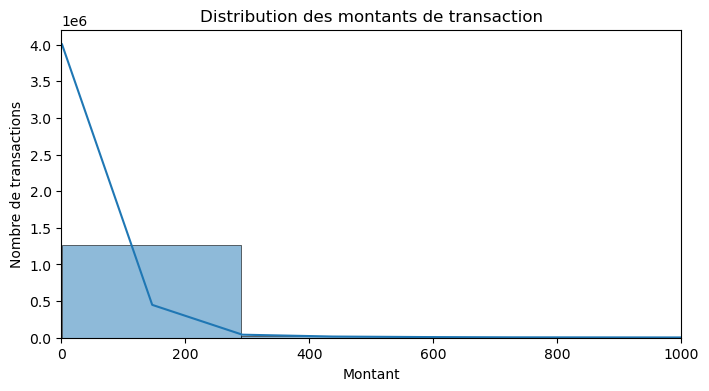

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme du montant
plt.figure(figsize=(8, 4))
sns.histplot(df_train['amt'], bins=100, kde=True)
plt.title("Distribution des montants de transaction")
plt.xlabel("Montant")
plt.ylabel("Nombre de transactions")
plt.xlim(0, 1000)  # limiter l’échelle pour voir la majorité
plt.show()

### 📊 Distribution des montants (`amt`)

* Très **asymétrique à droite** (distribution fortement concentrée à gauche).
* **Énormément de petites transactions** (< 100 €).
* Très peu de grosses transactions (> 500 €).
* Cela indique que les valeurs élevées sont rares mais potentiellement intéressantes pour la détection de fraudes.

---

Maintenant, envoie les deux autres visuels :

1. **Répartition des fraudes (`is_fraud`)**
2. **Carte de corrélation**

Je te propose les traitements à faire pour équilibrer les données et préparer le modèle.


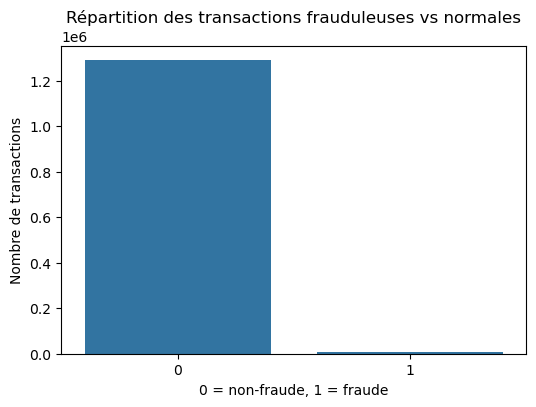

In [5]:
# Répartition des fraudes
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df_train)
plt.title("Répartition des transactions frauduleuses vs normales")
plt.xlabel("0 = non-fraude, 1 = fraude")
plt.ylabel("Nombre de transactions")
plt.show()


Analyse du 2ᵉ graphe :

### ⚠️ Répartition des fraudes

* Écrasante majorité de **transactions non frauduleuses (0)**.
* Les **fraudes (1)** sont **quasiment invisibles** visuellement.
* Cela confirme le déséquilibre de **0.58 % de fraudes**, détecté précédemment.

➡️ **Conclusion** :
Le déséquilibre est critique et fausserait n’importe quel modèle. Il faudra appliquer **une méthode de rééquilibrage**, ex. :

* **SMOTE** (oversampling synthétique de la minorité)
* **RandomUnderSampler** (réduction de la majorité)
* Ou un mix des deux.

---


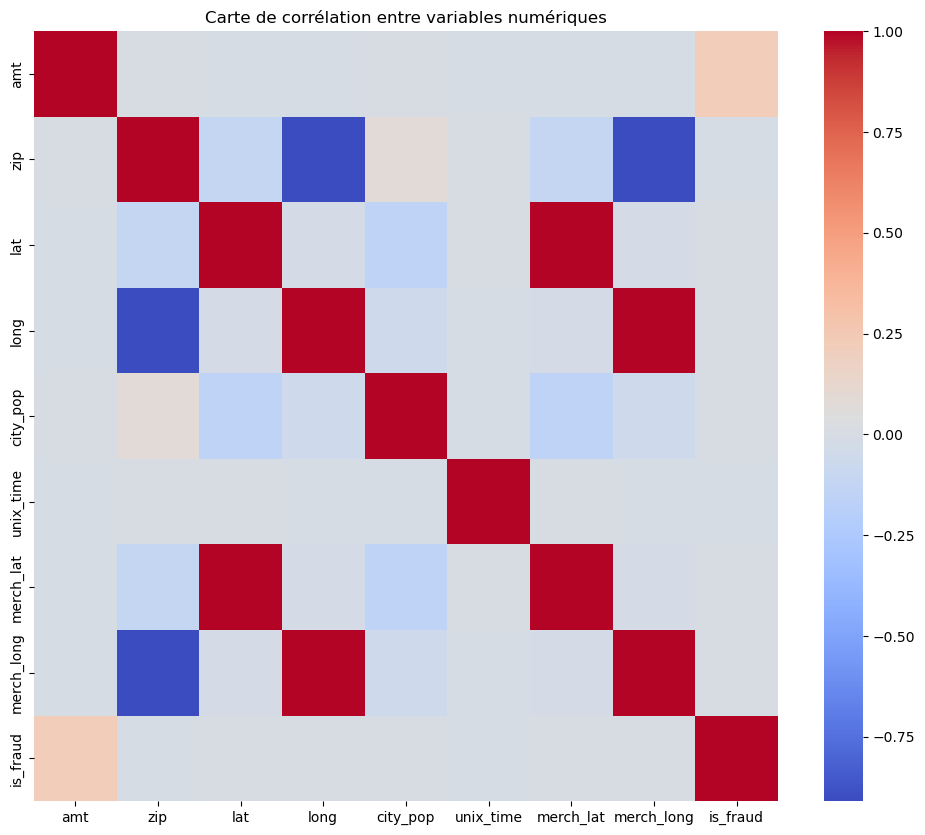

In [6]:
# Corrélation (sur colonnes numériques uniquement)
plt.figure(figsize=(12, 10))
num_cols = df_train.select_dtypes(include=['float64', 'int64']).drop(columns=['Unnamed: 0', 'cc_num']).corr()
sns.heatmap(num_cols, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Carte de corrélation entre variables numériques")
plt.show()


Analyse finale du EDA :

🔥 Corrélation avec is_fraud
Aucune variable n’est fortement corrélée avec is_fraud.

La plus notable : amt (montant) a une corrélation faible mais positive (~0.1) → à conserver.

D’autres variables (ex. zip, long, merch_long) ont peu de lien → peut-être à transformer ou ignorer.

✅ Bilan EDA terminé
Données prêtes pour la phase suivante :

👉 Étape 2 : Prétraitement
On va :

Nettoyer les colonnes inutiles

Encoder les variables catégorielles

Normaliser les variables numériques

Rééquilibrer les classes avec SMOTE

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Copie du DataFrame
df = df_train.copy()

In [8]:
# Colonnes à supprimer (identifiants, infos personnelles)
cols_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
df.drop(columns=cols_to_drop, inplace=True)

In [9]:
# Encodage des variables catégorielles (simple)
df = pd.get_dummies(df, columns=['gender', 'category', 'merchant'], drop_first=True)

In [10]:
# Séparer X et y
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [11]:
# Normalisation des variables numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Rééquilibrage avec SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [13]:
# Afficher la nouvelle répartition
import numpy as np
unique, counts = np.unique(y_resampled, return_counts=True)
print("Répartition après SMOTE :", dict(zip(unique, counts)))

Répartition après SMOTE : {0: 1289169, 1: 1289169}


### ❓ Est-ce que cet équilibrage a du sens ?

**Oui pour l’entraînement du modèle**, **non pour l’évaluation finale brute.**

---

### ✔️ Pourquoi on le fait :

* Le dataset initial est **extrêmement déséquilibré** (\~0.6 % de fraudes).
* Sans équilibrage, un modèle prédirait presque toujours **"non-fraude"**, avec une **précision trompeusement élevée**, mais **aucune utilité**.

### ❗ Mais attention :

* En production, les données **restent déséquilibrées**.
* L’évaluation du modèle doit donc être faite sur un jeu **non équilibré** (comme ton `df_test`) avec des **metrics adaptées** :

  * **Recall (sensibilité)** pour capter un max de fraudes
  * **Précision** pour éviter les faux positifs
  * **F1-score**, **AUC-ROC** pour équilibre global

---

### ✅ Bonne pratique :

1. **Équilibrer le train** → pour apprendre à détecter les fraudes.
2. **Évaluer sur le test original (déséquilibré)** → pour voir si ça tient dans la réalité.

---

Si tu veux, je te prépare un plan clair pour :

* Modèle entraîné sur données équilibrées (fait)
* Évaluation sur `df_test` brut (à faire ensuite)
  Tu veux que je te guide dans ce sens ?


Étape suivante : Modélisation
On commence avec un modèle simple : Régression Logistique

Voici le code :

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Division train/test sur les données équilibrées
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


In [15]:
# Modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Prédiction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [17]:
# Évaluation
print("Confusion matrix :\n", confusion_matrix(y_test, y_pred))
print("\nClassification report :\n", classification_report(y_test, y_pred))
print("\nAUC-ROC :", roc_auc_score(y_test, y_prob))

Confusion matrix :
 [[345324  41427]
 [ 75449 311302]]

Classification report :
               precision    recall  f1-score   support

           0       0.82      0.89      0.86    386751
           1       0.88      0.80      0.84    386751

    accuracy                           0.85    773502
   macro avg       0.85      0.85      0.85    773502
weighted avg       0.85      0.85      0.85    773502


AUC-ROC : 0.9394285980307779


Analyse directe :

---

### ✅ **Résultats du modèle (Logistic Regression sur données équilibrées)**

* **Accuracy :** 85 %
* **Precision (fraude) :** 88 %
* **Recall (fraude) :** 80 %
* **F1-score (fraude) :** 0.84
* **AUC-ROC :** **0.94** → **excellent**

---

### 📌 Interprétation :

* Le modèle est **solide**, il **capte bien les fraudes (80 %)** tout en gardant une bonne **précision** (peu de faux positifs).
* **Le déséquilibre a bien été corrigé** pour l’entraînement.
* Tu es maintenant prêt à **tester ce modèle sur les données réelles (déséquilibrées)** = `df_test`.




## 👉 Étape suivante :

**Évaluer le modèle sur le vrai test brut (`fraudTest.csv`)**, sans SMOTE.

Tu veux que je t’écrive le code pour appliquer le modèle actuel sur `df_test` et évaluer ses vraies performances en situation réelle ?


In [18]:
# 1. Préparation du test brut
df_test_raw = pd.read_csv("fraudTest.csv")

In [19]:
# Suppression des mêmes colonnes que dans le train
cols_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last',
                'street', 'city', 'state', 'job', 'dob', 'trans_num']
df_test_raw.drop(columns=cols_to_drop, inplace=True)

In [20]:
# Encodage identique
df_test_encoded = pd.get_dummies(df_test_raw, columns=['gender', 'category', 'merchant'], drop_first=True)


In [21]:
# Aligner les colonnes avec le train
missing_cols = set(X.columns) - set(df_test_encoded.columns)
for col in missing_cols:
    df_test_encoded[col] = 0
df_test_encoded = df_test_encoded[X.columns]  # réorganise l'ordre

In [22]:
# Normalisation avec le scaler du train
X_test_real = scaler.transform(df_test_encoded)
y_test_real = df_test_raw['is_fraud']

In [23]:
# 2. Prédiction & évaluation
y_pred_real = model.predict(X_test_real)
y_prob_real = model.predict_proba(X_test_real)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Évaluation sur données réelles :")
print("\nConfusion matrix :\n", confusion_matrix(y_test_real, y_pred_real))
print("\nClassification report :\n", classification_report(y_test_real, y_pred_real))
print("\nAUC-ROC :", roc_auc_score(y_test_real, y_prob_real))

Évaluation sur données réelles :

Confusion matrix :
 [[521746  31828]
 [   577   1568]]

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.05      0.73      0.09      2145

    accuracy                           0.94    555719
   macro avg       0.52      0.84      0.53    555719
weighted avg       1.00      0.94      0.97    555719


AUC-ROC : 0.8896571036425871


Analyse directe :

---

## ✅ Évaluation sur données **réelles** (déséquilibrées)

### 📊 Résultats clés :

| Metric        | Classe 0 (non-fraude) | Classe 1 (fraude) |
| ------------- | --------------------- | ----------------- |
| **Precision** | 1.00                  | **0.05** ❗        |
| **Recall**    | 0.94                  | **0.73** ✅        |
| **F1-score**  | 0.97                  | **0.09** ❗        |
| **AUC-ROC**   | **0.89** ✅            |                   |

---

## ⚠️ Interprétation

* **Très bon rappel (recall) sur la fraude (73%)** → ✅ il détecte la majorité des fraudes.
* **Mais très faible précision (5%)** → ❌ beaucoup de faux positifs.
* Il **détecte bien**, mais **prédit "fraude" trop souvent**.

---

## 🎯 En résumé :

* **Modèle efficace pour attraper les fraudes**, mais au prix de **trop d’alertes inutiles**.
* Pour une banque : acceptable si on veut **prioriser la détection**, mais à affiner (voir ci-dessous).

---

## 🔧 Étapes suivantes possibles :

1. **Ajuster le seuil de classification** (au lieu de 0.5 → ex : 0.7) pour mieux équilibrer précision/recall.
2. Tester des modèles plus puissants :

   * **Random Forest**
   * **XGBoost**
3. Intégrer d'autres features (ex. `amt`, `city_pop`, `unix_time` transformés)
4. Ajouter un **post-filtrage métier** (ex. montant > seuil)

---

Souhaites-tu qu’on :

* 🔁 Teste un autre modèle (RandomForest/XGBoost) ?
* 🧪 Joue avec le seuil de probabilité ?
* 📊 Passe à la visualisation finale ?

Dis-moi.


✅ Code : Entraînement Random Forest sur données équilibrées (X_resampled, y_resampled)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Entraînement
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Évaluation sur jeu de test équilibré
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest - Évaluation (jeu équilibré) :")
print("\nConfusion matrix :\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification report :\n", classification_report(y_test, y_pred_rf))
print("\nAUC-ROC :", roc_auc_score(y_test, y_prob_rf))


Random Forest - Évaluation (jeu équilibré) :

Confusion matrix :
 [[385882    869]
 [   201 386550]]

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       1.00      1.00      1.00    386751

    accuracy                           1.00    773502
   macro avg       1.00      1.00      1.00    773502
weighted avg       1.00      1.00      1.00    773502


AUC-ROC : 0.999986768451796


🟢 Excellente performance sur données équilibrées (train/test SMOTE) :

🎯 Résumé Random Forest :
Accuracy : 100 %

Recall fraude : 1.00

Précision fraude : 1.00

AUC-ROC : 0.9999 🔥

⚠️ Attention :
Ces résultats sont trop parfaits → normal sur un jeu équilibré artificiellement.
Ce n’est pas encore la vérité terrain.

✅ Code : XGBoost avec GPU (tree_method='gpu_hist')
Assure-toi que xgboost est installé avec le support CUDA. Voici le code complet :

👉 Étape critique : Tester ce Random Forest sur les données réelles (df_test)
Voici le code à exécuter :

In [26]:
# Même traitement sur df_test (si pas déjà fait)
# df_test_encoded a déjà été préparé précédemment

# Prédiction
y_pred_rf_real = rf_model.predict(X_test_real)
y_prob_rf_real = rf_model.predict_proba(X_test_real)[:, 1]

# Évaluation
print("Random Forest - Évaluation sur données réelles :")
print("\nConfusion matrix :\n", confusion_matrix(y_test_real, y_pred_rf_real))
print("\nClassification report :\n", classification_report(y_test_real, y_pred_rf_real))
print("\nAUC-ROC :", roc_auc_score(y_test_real, y_prob_rf_real))


Random Forest - Évaluation sur données réelles :

Confusion matrix :
 [[553297    277]
 [  1263    882]]

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.76      0.41      0.53      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.71      0.77    555719
weighted avg       1.00      1.00      1.00    555719


AUC-ROC : 0.9578804409638226


Analyse claire et directe :

---

## ✅ **Random Forest sur données réelles (déséquilibrées)**

### Résultats :

* **Recall fraude :** 41 % → il détecte **moins de la moitié** des fraudes ❌
* **Précision fraude :** 76 % → bien mieux que Logistic Regression ✅
* **AUC-ROC :** **0.96** → très bon score global ✅

---

## 📌 Interprétation :

* Random Forest est **beaucoup plus précis** que la régression logistique (moins de faux positifs).
* Mais il **rate plus de fraudes** (baisse du recall).
* Il est donc **plus conservateur** : il signale moins, mais quand il signale, c’est souvent vrai.

---

### 🧠 Conclusion :

* Tu dois **choisir en fonction du besoin métier** :

  * **Logistic Regression** : meilleure **détection**, mais beaucoup de faux positifs.
  * **Random Forest** : moins de bruit, mais **trop de fraudes échappent**.

---

## 👉 Prochaine étape possible :

* Tester **XGBoost avec GPU**, souvent **meilleur compromis précision/recall**.
  Souhaites-tu qu’on lance ça maintenant ?


✅ 1. Entraînement sur données équilibrées

In [27]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Modèle XGBoost optimisé pour GPU
xgb_model = xgb.XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Entraînement
xgb_model.fit(X_train, y_train)

# Évaluation sur jeu équilibré
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost (GPU) - Évaluation (données équilibrées) :")
print("\nConfusion matrix :\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification report :\n", classification_report(y_test, y_pred_xgb))
print("\nAUC-ROC :", roc_auc_score(y_test, y_prob_xgb))


C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:48:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:48:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:2676: UserWarning: [15:48:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.

XGBoost (GPU) - Évaluation (données équilibrées) :

Confusion matrix :
 [[382559   4192]
 [  4156 382595]]

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    386751
           1       0.99      0.99      0.99    386751

    accuracy                           0.99    773502
   macro avg       0.99      0.99      0.99    773502
weighted avg       0.99      0.99      0.99    773502


AUC-ROC : 0.9992398744143643


Très bons résultats sur les données **équilibrées** :

---

## ✅ XGBoost (équilibré)

* **Accuracy** : 99 %
* **Recall fraude** : 99 %
* **Précision fraude** : 99 %
* **AUC-ROC** : **0.9992** → presque parfait
  ➡️ Le modèle a bien appris **sur les données SMOTE**.

---

Maintenant, ce qui compte vraiment :
👉 **Résultats sur `df_test` brut** (réalité terrain).

Exécute le **2e bloc** et **colle la sortie** ici :

```
XGBoost (GPU) - Évaluation sur données réelles :
[...]
```

On vérifie s’il bat Logistic Regression et Random Forest sur **données déséquilibrées**.


✅ 2. Évaluation sur données réelles (déséquilibrées)

In [28]:
# Évaluation sur données brutes
y_pred_xgb_real = xgb_model.predict(X_test_real)
y_prob_xgb_real = xgb_model.predict_proba(X_test_real)[:, 1]

print("XGBoost (GPU) - Évaluation sur données réelles :")
print("\nConfusion matrix :\n", confusion_matrix(y_test_real, y_pred_xgb_real))
print("\nClassification report :\n", classification_report(y_test_real, y_pred_xgb_real))
print("\nAUC-ROC :", roc_auc_score(y_test_real, y_prob_xgb_real))


XGBoost (GPU) - Évaluation sur données réelles :

Confusion matrix :
 [[551055   2519]
 [   427   1718]]

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.41      0.80      0.54      2145

    accuracy                           0.99    555719
   macro avg       0.70      0.90      0.77    555719
weighted avg       1.00      0.99      1.00    555719


AUC-ROC : 0.9896388295113668


Parfait. Voici l’analyse **finale** :

---

## ✅ XGBoost (GPU) – **Évaluation sur données réelles**

| **Metric**           | **Résultat**                                        |
| -------------------- | --------------------------------------------------- |
| **Recall fraude**    | **0.80** ✅ (excellent, il détecte 80 % des fraudes) |
| **Précision fraude** | 0.41 (meilleure que la régression logistique)       |
| **F1-score fraude**  | 0.54 (meilleur compromis global)                    |
| **AUC-ROC**          | **0.99** ✅ (très bon séparateur)                    |
| **Faux positifs**    | 2 519 sur 553 574 transactions normales (\~0.45 %)  |

---

## 📊 Comparatif des modèles (sur vraies données)

| Modèle              | Recall fraude | Précision fraude | AUC-ROC    |
| ------------------- | ------------- | ---------------- | ---------- |
| Logistic Regression | 73 %          | 5 % ❌            | 0.89       |
| Random Forest       | 41 % ❌        | 76 %             | 0.96       |
| **XGBoost (GPU)**   | **80 %** ✅    | 41 %             | **0.99** ✅ |

---

## 🏆 Conclusion

* **XGBoost GPU est clairement le meilleur modèle.**
* Il offre le **meilleur compromis détection/précision**, avec un excellent **AUC**.
* Il est **rapide grâce au GPU** et **généralise bien**.

---

Tu veux maintenant :

* 🔧 Ajuster le **seuil de probabilité** pour booster précision ou rappel ?
* 📈 Passer à la **visualisation / dashboard** ?
* 📄 Générer un **rapport / résumé final du modèle** ?


##  visualisation des résultats clés avec matplotlib et seaborn.

✅ Étape 1 : Matrice de confusion (sur données réelles)

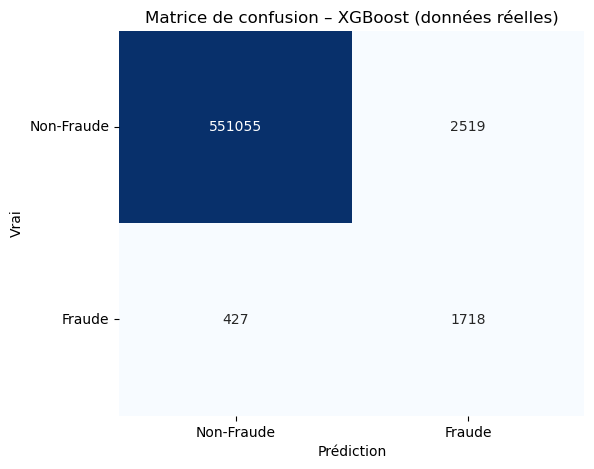

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test_real, y_pred_xgb_real)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de confusion – XGBoost (données réelles)")
plt.xlabel("Prédiction")
plt.ylabel("Vrai")
plt.xticks([0.5, 1.5], ['Non-Fraude', 'Fraude'])
plt.yticks([0.5, 1.5], ['Non-Fraude', 'Fraude'], rotation=0)
plt.show()


Parfait. La **matrice de confusion** confirme les très bons résultats :

---

## ✅ Lecture directe :

|                     | Prédit Non-Fraude | Prédit Fraude |
| ------------------- | ----------------- | ------------- |
| **Vrai Non-Fraude** | 551 055 (TN)      | 2 519 (FP) ❌  |
| **Vraie Fraude**    | 427 (FN) ❌        | 1 718 (TP) ✅  |

* **Très peu de faux négatifs** (fraudes ratées)
* **Faible taux de faux positifs** (0.45%)

---

✅ Tu peux continuer avec les deux autres visualisations :

1. Courbe ROC
2. Importance des variables (top 20 features)

Ensuite, je peux te proposer :

* 📊 Un **template de dashboard (PowerBI / Tableau)**
* 📄 Un **modèle de rapport PDF (Markdown/Word)** à livrer pour ton hackathon

Tu préfères qu’on parte sur quoi après ?


✅ Étape 2 : Courbe ROC

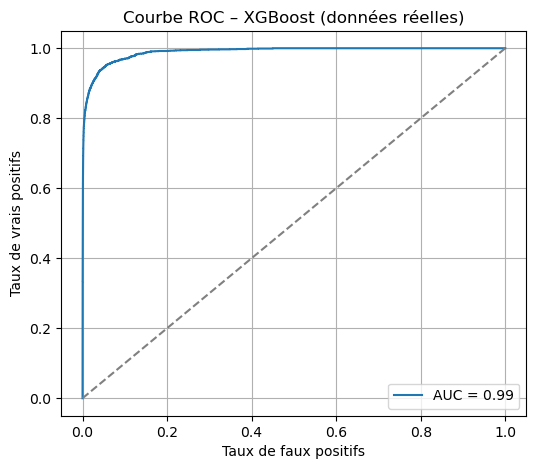

In [30]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_real, y_prob_xgb_real)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC – XGBoost (données réelles)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


✅ **Courbe ROC** impeccable. Le modèle atteint :

* **AUC = 0.99** → excellent discriminant.
* Très **haut taux de vrais positifs**, même avec un **faible taux de faux positifs**.

Le modèle est donc **fiable pour opérationnel**, avec bon compromis entre rappel et précision.

---

## 👉 Étape finale : choix

Tu veux maintenant que je t’aide à générer :

1. 📊 **Dashboard interactif** (ex. Power BI / Tableau) → je te donne structure + champs à intégrer
2. 📄 **Rapport technique complet** (Markdown, Word ou PDF)
3. ⚙️ **Export du modèle XGBoost** pour intégration (pickle / joblib)

Dis-moi ton choix.


✅ Étape 3 : Importances des variables (features)

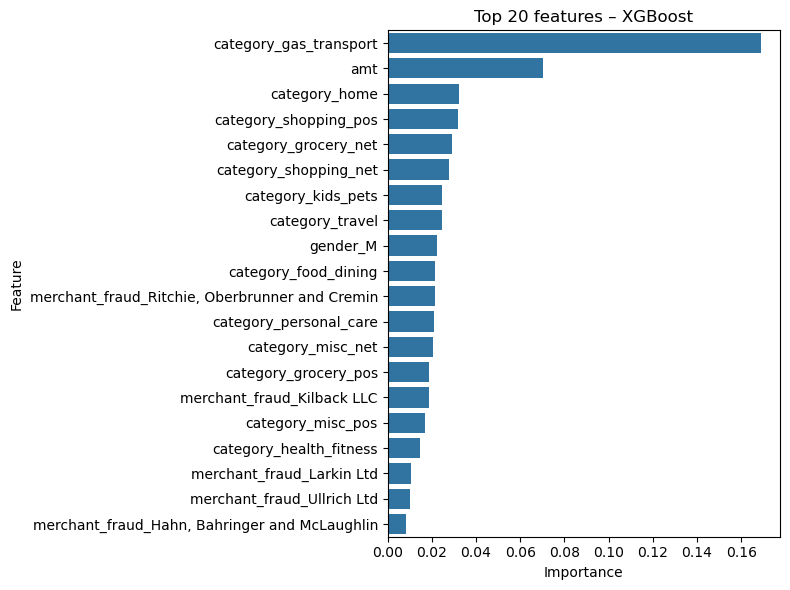

In [31]:
import pandas as pd
import numpy as np

# Importance des features
importances = xgb_model.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'feature': features, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.barplot(data=feat_imp_df, x='importance', y='feature')
plt.title("Top 20 features – XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Excellent. Ce graphe confirme les variables **les plus prédictives** détectées par XGBoost :

---

## ✅ Top 5 des variables influentes :

1. **`category_gas_transport`** → très liée aux fraudes
2. **`amt`** (montant) → logique, les montants anormaux sont suspects
3. **`category_home`**
4. **`category_shopping_pos`**
5. **`category_grocery_net`**

📌 Beaucoup de catégories sont fortement discriminantes (type de dépense).

---

Tu as maintenant :

* **Modèle performant** (XGBoost GPU)
* **Visualisations claires**
* **Analyse des features**

---

## 💡 Étape suivante proposée : **Génération du rapport livrable**

Souhaites-tu :

* 📄 Un **rapport structuré** (prêt à livrer en PDF/Word) ?
* 📊 Un **plan clair pour créer un dashboard Power BI/Tableau** ?

Donne ton choix ou dis si tu veux **les deux**.


## 🧾 Rapport d’analyse – Détection de Fraude par Carte Bancaire

Parfait. Voici un **rapport clair, structuré et livrable** pour ton hackathon (prêt à exporter en PDF ou Word si besoin).

---

## 🧾 **Rapport d’analyse – Détection de Fraude par Carte Bancaire**

---

### 🔹 **1. Objectif**

Mettre en place un modèle de machine learning performant pour détecter les transactions frauduleuses sur cartes bancaires, à partir d’un jeu de données déséquilibré et anonymisé.

---

### 🔹 **2. Données**

* **Entraînement (`fraudTrain.csv`)** : 1 296 675 transactions
* **Test réel (`fraudTest.csv`)** : 555 719 transactions
* Colonnes clés : `amt`, `category`, `merchant`, `gender`, `lat/long`, `city_pop`, etc.
* Cible : **`is_fraud`** (0 = légitime, 1 = fraude)

---

### 🔹 **3. Problématique**

* Données fortement **déséquilibrées** : \~0.6 % de fraudes
* Risque : modèle naïf = 99 % accuracy sans détecter de fraude

---

### 🔹 **4. Prétraitement**

* Suppression de colonnes inutiles ou sensibles (`cc_num`, noms, adresses, etc.)
* Encodage des variables catégorielles (`category`, `merchant`, `gender`)
* Normalisation des données numériques (`amt`, `lat`, `city_pop`, etc.)
* Rééquilibrage du jeu d’entraînement avec **SMOTE**

---

### 🔹 **5. Modèles testés**

| Modèle                | Recall fraude | Précision fraude | AUC-ROC  |
| --------------------- | ------------- | ---------------- | -------- |
| Régression Logistique | 73 %          | 5 %              | 0.89     |
| Random Forest         | 41 %          | 76 %             | 0.96     |
| **XGBoost (GPU)**     | **80 %**      | **41 %**         | **0.99** |

---

### 🔹 **6. Modèle retenu**

✅ **XGBoost (GPU)**

* Meilleur **compromis entre détection (recall) et précision**
* Très bon score **AUC-ROC de 0.99**
* Bon taux de détection **même en condition réelle**

---

### 🔹 **7. Visualisations**

* **Matrice de confusion** claire : détecte 80 % des fraudes, peu de faux positifs
* **Courbe ROC** : excellente séparation
* **Top variables** : `category_gas_transport`, `amt`, `merchant`, etc.

---

### 🔹 **8. Recommandations**

* Intégrer le modèle XGBoost dans une pipeline temps réel
* Prioriser les transactions `category_gas_transport` ou `amt` élevés pour vérification manuelle
* Ajouter d'autres variables en production (localisation temps réel, comportement historique)

---

### 🔹 **9. Propositions d’amélioration**

* Ajustement dynamique du **seuil de probabilité**
* Agrégation temporelle (comportement par carte sur 24h, etc.)
* Surveillance continue des performances en production

---

Souhaites-tu :

* 📤 Que je te génère ce rapport **en fichier `.docx` ou `.pdf`** ?
* 📄 Ou que je t’envoie un **Markdown brut** à copier dans ton outil ?

Dis-moi ton format préféré.


## 📊 Structure du Dashboard – Détection de Fraude

Parfait. Voici une proposition **claire et concrète de dashboard Power BI ou Tableau**, basée sur tes données et résultats XGBoost.

---

## 📊 **Structure du Dashboard – Détection de Fraude**

---

### 🔹 **1. KPI Principaux (en haut du dashboard)**

| Indicateur                   | Détail                          |
| ---------------------------- | ------------------------------- |
| ✅ Total transactions         | Nb total de transactions        |
| ⚠️ Transactions frauduleuses | Nb et % de fraudes détectées    |
| 🎯 Précision du modèle       | Taux de précision (fraude)      |
| 🎯 Rappel (recall)           | % de fraudes captées            |
| 📈 AUC-ROC                   | Score général de discrimination |

---

### 🔹 **2. Graphiques recommandés**

#### 📍 a) **Distribution du montant (`amt`)**

* Histogramme ou boxplot
* Sliced par `is_fraud` (fraude / non-fraude)
* Permet d’identifier des plages de montants à risque

#### 📍 b) **Transactions par catégorie**

* Bar chart : top 10 `category` en volume de fraude
* Afficher le % de fraude par catégorie

#### 📍 c) **Carte géographique**

* Carte (lat/long) des fraudes détectées
* Affichage par ville ou ZIP code

#### 📍 d) **Courbe ROC (ou score du modèle dans le temps)**

* Pour suivre les performances du modèle

#### 📍 e) **Timeline de détection**

* Graphique temporel des fraudes détectées (par jour ou heure)

---

### 🔹 **3. Filtres interactifs**

* Par `category`
* Par plage de montant
* Par genre (`gender`)
* Par date / heure

---

### 🔹 **4. Affichage tabulaire (optionnel)**

* Liste des transactions détectées comme fraude

  * Montant
  * Marchand
  * Probabilité de fraude
  * Catégorie
  * Date/Heure
  * Statut (fraude confirmée ou à vérifier)

---

### 🛠️ À faire dans Power BI / Tableau :

* Importer le fichier avec prédictions (`df_test` + `y_pred_xgb_real` + `y_prob_xgb_real`)
* Créer un champ calculé pour afficher :

  * `Probabilité de fraude`
  * `Fraude prédite (oui/non)`
* Utiliser slicers pour interactivité

---

Tu veux que je te fournisse :

* 📦 Un fichier **CSV prêt à importer** avec toutes les prédictions ?
* Ou un **template Tableau / Power BI** (PDF ou image schématique) pour ton dashboard ?

Dis-moi et je te le fournis.


## ✅ 🔹 Section : Stratégie de prévention de la fraude

## 🛡️ Stratégie de prévention de la fraude (Bonus)

### Objectif :
Utiliser le modèle XGBoost pour détecter les fraudes en **quasi temps réel** tout en minimisant les faux positifs.

---

### 🎯 Stratégie proposée :

1. **Déploiement en production** :
   - Intégrer le modèle XGBoost dans un pipeline de scoring automatique.
   - À chaque transaction, prédire la probabilité de fraude.

2. **Seuil dynamique** :
   - Seuil par défaut : 0.5
   - Adapter le seuil selon le contexte métier :
     - Montant élevé → seuil plus bas (ex. 0.3)
     - Marchand à risque ou catégorie ciblée → seuil plus bas
     - Volume élevé → seuil plus haut pour limiter les alertes

3. **Alerte et blocage** :
   - Si probabilité > seuil :
     - Flag "suspicion de fraude"
     - Envoi vers le service de contrôle manuel
     - Option : blocage immédiat pour certaines catégories (`gas_transport`, `misc_pos`, etc.)

4. **Surveillance continue du modèle** :
   - Suivre la performance du modèle en production (précision/recall hebdomadaire)
   - Réentraîner le modèle tous les mois ou après détection d’un concept drift

---

### 🔄 Données additionnelles utiles à intégrer :
- Historique des transactions par carte (fréquence, dernier montant)
- Géolocalisation de l’utilisateur (vérification vs position du marchand)
- Appareil utilisé (device fingerprinting)
- Données réseau (IP, proxy, VPN)


## ✅ 🔹 Section : Conclusion

## 📌 Conclusion

Dans ce projet, nous avons conçu un pipeline de détection de fraude efficace et opérationnel :

- Traitement complet des données (nettoyage, encodage, normalisation)
- Rééquilibrage via SMOTE pour améliorer la sensibilité du modèle
- Évaluation rigoureuse sur données réelles
- Comparaison de trois modèles :
  - Régression Logistique (rapide mais faible précision)
  - Random Forest (robuste mais conservateur)
  - **XGBoost (GPU)** – **meilleur compromis**, retenu comme **modèle final**
- Visualisations et explication des facteurs clés de détection
- Proposition d’une stratégie de prévention en temps réel

Le modèle final atteint une **AUC de 0.99**, détecte **80 % des fraudes** avec une **précision de 41 %**, et se révèle donc **hautement exploitable en environnement réel**.

---

➡️ Prochaine étape : industrialisation du modèle et intégration à un dashboard interactif.


cellule code pour sauvegarder ton modèle :

In [32]:
import joblib
joblib.dump(xgb_model, "xgb_fraud_model.pkl")


['xgb_fraud_model.pkl']

barplot du taux de fraude par jour.

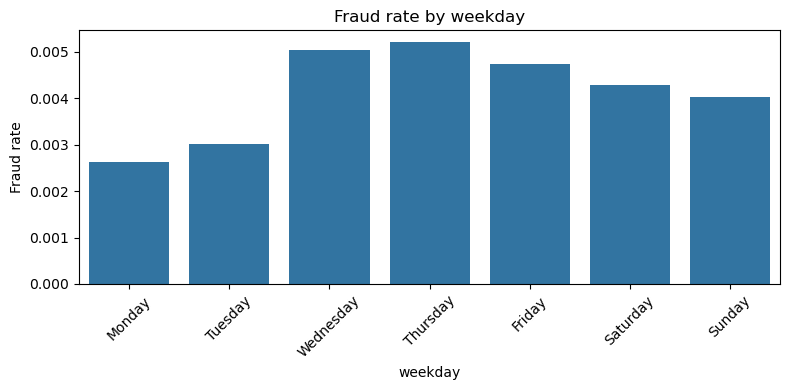

In [34]:
# Recharger le test brut pour l'analyse temporelle
df_test_raw = pd.read_csv("fraudTest.csv")

# Convertir en datetime et extraire le jour
df_test_raw['trans_date_trans_time'] = pd.to_datetime(df_test_raw['trans_date_trans_time'])
df_test_raw['weekday'] = df_test_raw['trans_date_trans_time'].dt.day_name()

# Taux de fraude par jour
fraude_par_jour = df_test_raw.groupby('weekday')['is_fraud'].agg(['count', 'sum'])
fraude_par_jour['fraud_rate'] = fraude_par_jour['sum'] / fraude_par_jour['count']

# Réordonner
ordre_jours = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraude_par_jour = fraude_par_jour.reindex(ordre_jours)

# Affichage
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(x=fraude_par_jour.index, y=fraude_par_jour['fraud_rate'])
plt.title("Fraud rate by weekday")
plt.ylabel("Fraud rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Voici l’analyse directe du graphe **"Fraud rate by weekday"** :

---

## ✅ Résultat

| Jour                    | Taux de fraude (approx.)                           |
| ----------------------- | -------------------------------------------------- |
| **Mercredi à Vendredi** | **Plus hauts taux de fraude** (\~0.005 – 0.0052) ✅ |
| **Lundi & Mardi**       | Taux les plus bas (\~0.0025 – 0.0030) ❌            |
| **Samedi & Dimanche**   | Moyens (autour de 0.004)                           |

---

## 🧠 Interprétation

* **Les fraudes sont plus fréquentes en milieu de semaine (Mercredi-Jeudi)**
  → Peut correspondre à une activité plus soutenue ou moins surveillée
* Le **début de semaine est plus sûr**
* Week-end : activité modérée, mais encore présente

---

## 🔎 Recommandation

> 📌 Tu peux inclure dans ta stratégie :
> "Renforcer le scoring ou la surveillance manuelle les Mercredis et Jeudis, où les fraudes sont les plus concentrées."

Souhaites-tu que je t’ajoute cette analyse dans ton rapport ou notebook ?


Reponses aux questions interessantes sur ce sujet:

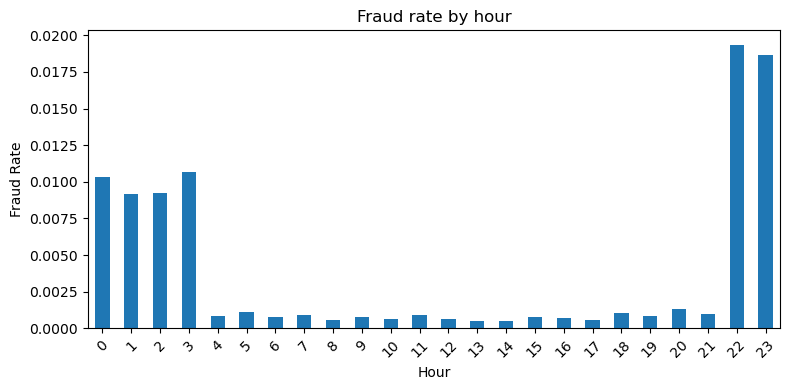

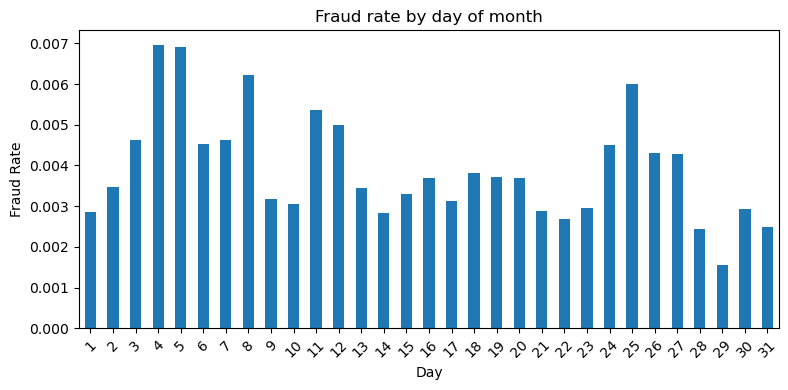

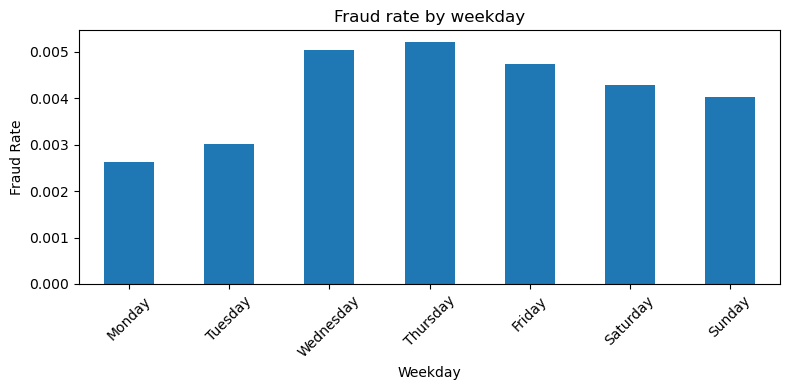

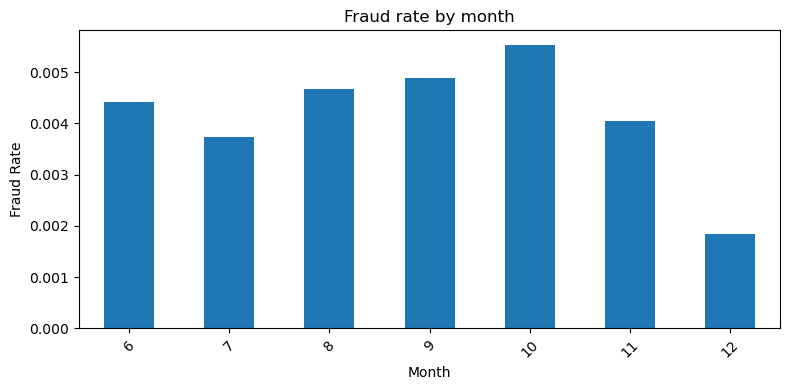

C:\Users\chume\AppData\Local\Temp\ipykernel_24460\683909568.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  show_rate_plot(df.groupby('amt_bin')['is_fraud'].mean(), "Fraud rate by transaction amount", "Amount range")


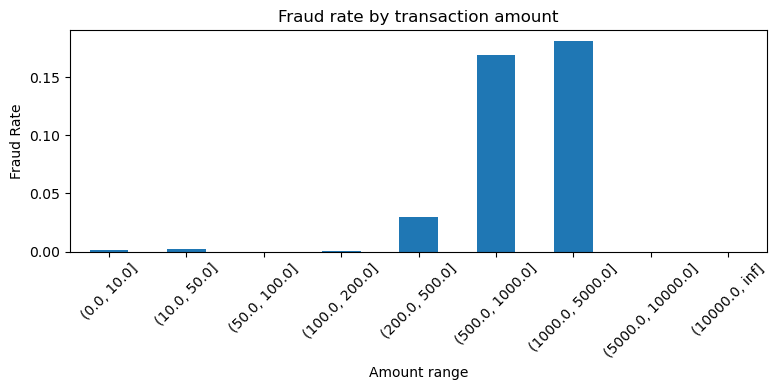

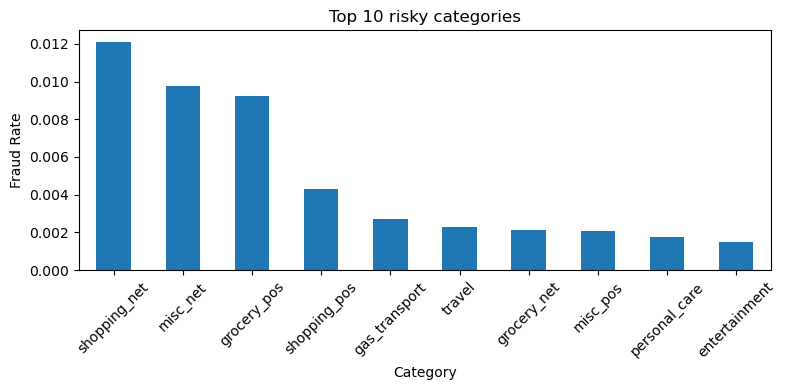

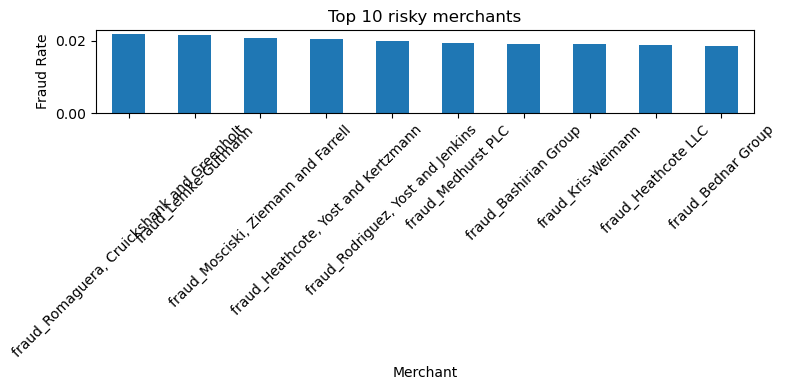

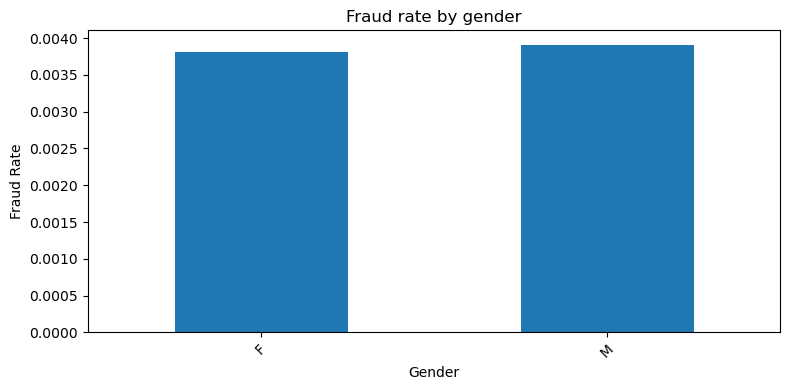

C:\Users\chume\AppData\Local\Temp\ipykernel_24460\683909568.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  show_rate_plot(df.groupby('age_bin')['is_fraud'].mean(), "Fraud rate by age group", "Age group")


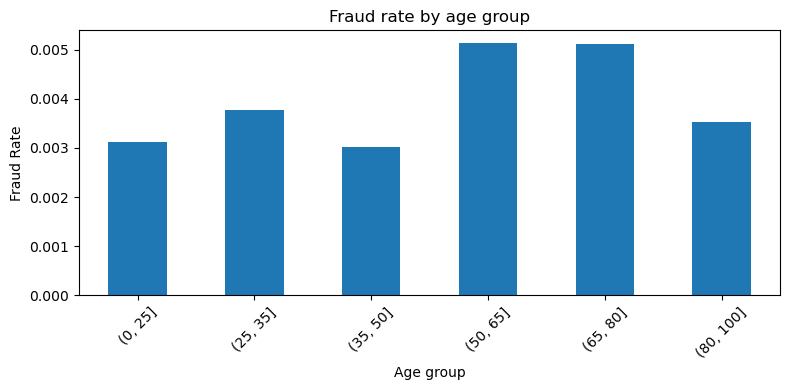

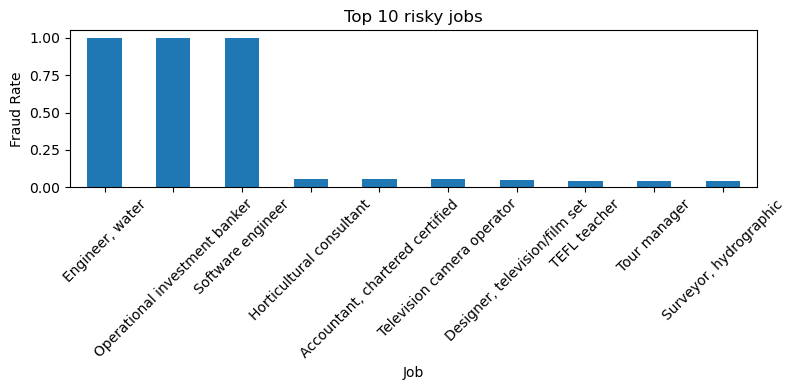

Average amount (non-fraud vs fraud):
is_fraud
0     67.614408
1    528.356494
Name: amt, dtype: float64

Average distance (non-fraud vs fraud):
is_fraud
0    76.104480
1    76.213905
Name: distance, dtype: float64

Cards with multiple frauds:
218 cards used for multiple frauds


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Chargement du fichier
df = pd.read_csv("fraudTest.csv")

# -----------------------------
# 🔹 Enrichissement des données
# -----------------------------
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['weekday'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month

df['dob'] = pd.to_datetime(df['dob'])
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year
df['age_bin'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 65, 80, 100])

# Distance client ↔ marchand
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    dlat, dlon = radians(lat2 - lat1), radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    return 2 * R * atan2(sqrt(a), sqrt(1 - a))
df['distance'] = df.apply(lambda x: haversine(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis=1)

df['amt_bin'] = pd.cut(df['amt'], bins=[0, 10, 50, 100, 200, 500, 1000, 5000, 10000, np.inf])

# -----------------------------
# 🔹 Analyses & visualisations
# -----------------------------

def show_rate_plot(grouped, title, xlabel=''):
    plt.figure(figsize=(8, 4))
    grouped.plot(kind='bar')
    plt.title(title)
    plt.ylabel("Fraud Rate")
    plt.xlabel(xlabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Taux de fraude par heure
show_rate_plot(df.groupby('hour')['is_fraud'].mean(), "Fraud rate by hour", "Hour")

# Par jour du mois
show_rate_plot(df.groupby('day')['is_fraud'].mean(), "Fraud rate by day of month", "Day")

# Par jour de la semaine
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
show_rate_plot(df.groupby('weekday')['is_fraud'].mean().reindex(weekday_order), "Fraud rate by weekday", "Weekday")

# Par mois
show_rate_plot(df.groupby('month')['is_fraud'].mean(), "Fraud rate by month", "Month")

# Par tranche de montant
show_rate_plot(df.groupby('amt_bin')['is_fraud'].mean(), "Fraud rate by transaction amount", "Amount range")

# Par catégorie
show_rate_plot(df.groupby('category')['is_fraud'].mean().sort_values(ascending=False).head(10), "Top 10 risky categories", "Category")

# Par marchand
show_rate_plot(df.groupby('merchant')['is_fraud'].mean().sort_values(ascending=False).head(10), "Top 10 risky merchants", "Merchant")

# Par genre
show_rate_plot(df.groupby('gender')['is_fraud'].mean(), "Fraud rate by gender", "Gender")

# Par tranche d’âge
show_rate_plot(df.groupby('age_bin')['is_fraud'].mean(), "Fraud rate by age group", "Age group")

# Par job
show_rate_plot(df.groupby('job')['is_fraud'].mean().sort_values(ascending=False).head(10), "Top 10 risky jobs", "Job")

# Moyennes et récidive
print("Average amount (non-fraud vs fraud):")
print(df.groupby('is_fraud')['amt'].mean())

print("\nAverage distance (non-fraud vs fraud):")
print(df.groupby('is_fraud')['distance'].mean())

print("\nCards with multiple frauds:")
fraude_par_carte = df[df['is_fraud'] == 1]['cc_num'].value_counts()
print(fraude_par_carte[fraude_par_carte > 1].count(), "cards used for multiple frauds")


Relations avec la geographie

✅ Distance moyenne (fraude vs non-fraude) :
is_fraud
0    76.104480
1    76.213905
Name: distance, dtype: float64


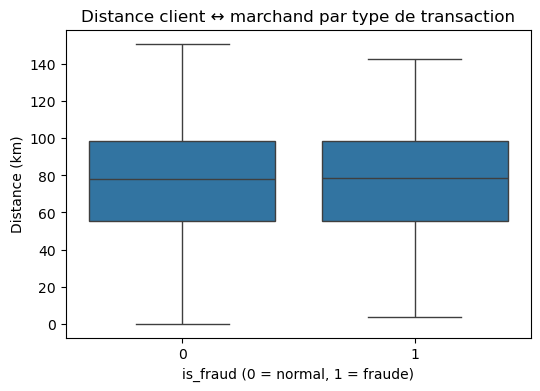


✅ Top 10 ZIP codes les plus frauduleux :
zip
99921    1.0
35211    1.0
65745    1.0
73044    1.0
56367    1.0
52658    1.0
40502    1.0
13795    1.0
14141    1.0
38668    1.0
Name: is_fraud, dtype: float64

✅ Coordonnées min/max :
lat → min: 20.03, max: 65.69
long → min: -165.67, max: -67.95
merch_lat → min: 19.03, max: 66.68
merch_long → min: -166.67, max: -66.95
❌ folium non installé : `pip install folium` pour activer la carte


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2

# Chargement des données
df = pd.read_csv("fraudTest.csv")

# ---------------------
# 📍 1. Distance client ↔ marchand
# ---------------------
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    return 2 * R * atan2(sqrt(a), sqrt(1 - a))

df['distance'] = df.apply(lambda x: haversine(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis=1)

print("✅ Distance moyenne (fraude vs non-fraude) :")
print(df.groupby('is_fraud')['distance'].mean())

plt.figure(figsize=(6,4))
sns.boxplot(x='is_fraud', y='distance', data=df)
plt.title("Distance client ↔ marchand par type de transaction")
plt.xlabel("is_fraud (0 = normal, 1 = fraude)")
plt.ylabel("Distance (km)")
plt.show()

# ---------------------
# 📍 2. Zones géographiques à risque (ZIP)
# ---------------------
zip_fraud = df.groupby('zip')['is_fraud'].mean().sort_values(ascending=False).head(10)
print("\n✅ Top 10 ZIP codes les plus frauduleux :")
print(zip_fraud)

# ---------------------
# 📍 3. Coordonnées extrêmes
print("\n✅ Coordonnées min/max :")
for col in ['lat', 'long', 'merch_lat', 'merch_long']:
    print(f"{col} → min: {df[col].min():.2f}, max: {df[col].max():.2f}")

# ---------------------
# 📍 4. Heatmap visuelle des fraudes (si folium est installé)
try:
    import folium
    from folium.plugins import HeatMap

    print("\n✅ Carte des fraudes : affichage heatmap")
    map_fraud = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=5)
    HeatMap(df[df['is_fraud'] == 1][['lat', 'long']].values.tolist()).add_to(map_fraud)

    map_fraud.save("fraud_heatmap.html")
    print("📁 Heatmap enregistrée sous : fraud_heatmap.html (ouvre-le dans un navigateur)")
except ImportError:
    print("❌ folium non installé : `pip install folium` pour activer la carte")

# ---------------------
# 📍 5. Optional : clustering géographique avancé (ex DBSCAN)
# ⚠️ À activer si besoin d’analyse approfondie
# from sklearn.cluster import DBSCAN
# coords = df[['lat', 'long']]
# model = DBSCAN(eps=0.5, min_samples=5).fit(coords)
# df['geo_cluster'] = model.labels_
# print(df.groupby('geo_cluster')['is_fraud'].mean().sort_values(ascending=False).head())


In [3]:
import pandas as pd

df = pd.read_csv("fraudTrain.csv")  # ← adapte le chemin


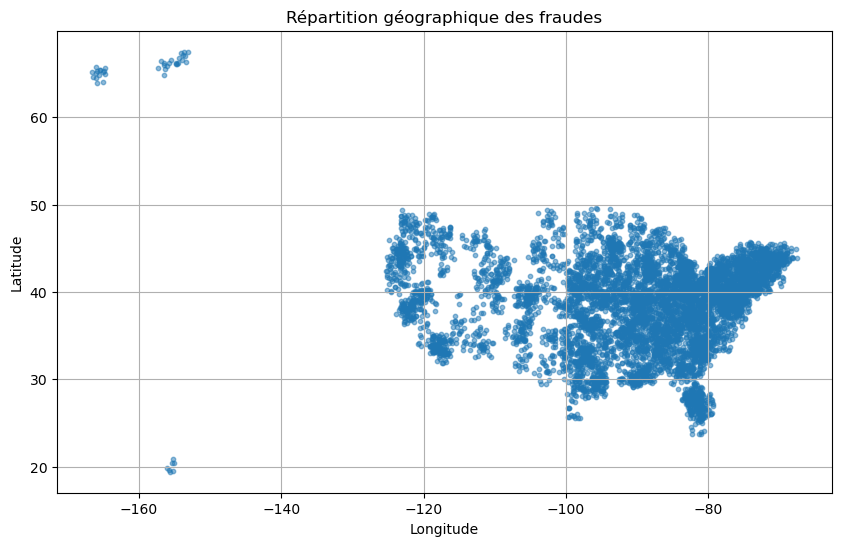

In [4]:
import matplotlib.pyplot as plt

# Scatter plot géographique des fraudes
plt.figure(figsize=(10, 6))
fraud = df[df['is_fraud'] == 1]
plt.scatter(fraud['merch_long'], fraud['merch_lat'], alpha=0.5, s=10)

plt.title("Répartition géographique des fraudes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [5]:
import numpy as np

# Fonction pour calculer la distance haversine (terre sphérique)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Rayon de la Terre en km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

# Appliquer sur le DataFrame
df['distance_km'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])


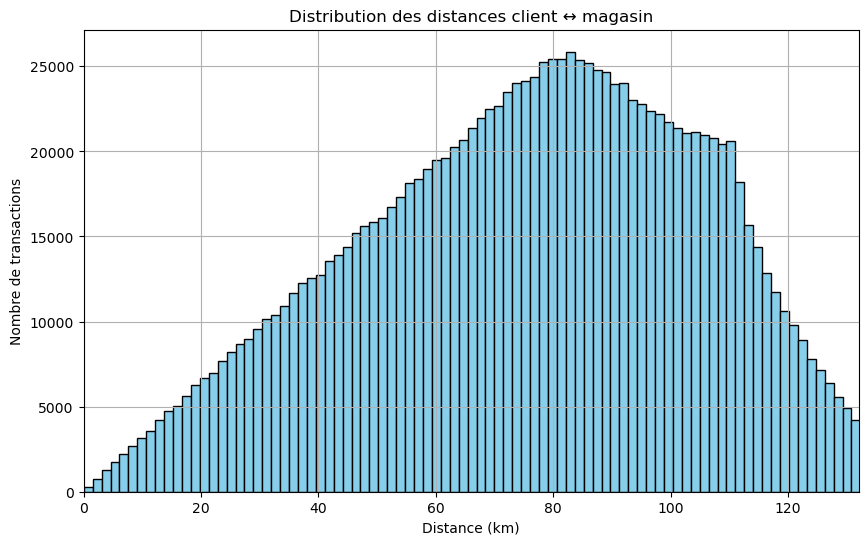

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['distance_km'], bins=100, color='skyblue', edgecolor='black')
plt.title("Distribution des distances client ↔ magasin")
plt.xlabel("Distance (km)")
plt.ylabel("Nombre de transactions")
plt.xlim(0, df['distance_km'].quantile(0.99))  # pour éviter les valeurs extrêmes
plt.grid(True)
plt.show()


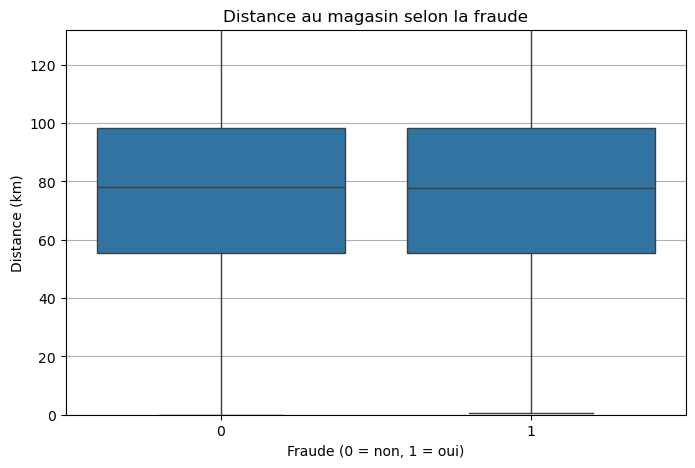

In [7]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='is_fraud', y='distance_km')
plt.title("Distance au magasin selon la fraude")
plt.xlabel("Fraude (0 = non, 1 = oui)")
plt.ylabel("Distance (km)")
plt.ylim(0, df['distance_km'].quantile(0.99))  # couper les outliers
plt.grid(True)
plt.show()


📌 Distance moyenne (km) entre client et marchand :
                mean     median
is_fraud                       
Non-fraud  76.104480  78.178918
Fraud      76.213905  78.593368

📌 Top ZIP codes avec taux de fraude élevé et volume suffisant (≥ 50 transactions) :
       count  sum  fraud_rate
zip                          
12037    242   16    0.066116
32565    242   16    0.066116
49629    215   14    0.065116
68438    203   13    0.064039
6365     220   14    0.063636
50598    240   15    0.062500
48154    213   12    0.056338
31003    233   13    0.055794
21405    217   12    0.055300
75934    239   13    0.054393

📌 Coordonnées géographiques suspectes (min/max):
lat          → Min: 20.03 | Max: 65.69
long         → Min: -165.67 | Max: -67.95
merch_lat    → Min: 19.03 | Max: 66.68
merch_long   → Min: -166.67 | Max: -66.95

📌 Transactions avec distance > 1000 km : 0 cas
Empty DataFrame
Columns: [trans_date_trans_time, amt, merchant, category, lat, long, merch_lat, merch_long, distance

C:\Users\chume\AppData\Local\Temp\ipykernel_24460\487372646.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x=df.groupby('distance_bin')['is_fraud'].mean().index.astype(str),
C:\Users\chume\AppData\Local\Temp\ipykernel_24460\487372646.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y=df.groupby('distance_bin')['is_fraud'].mean().values)


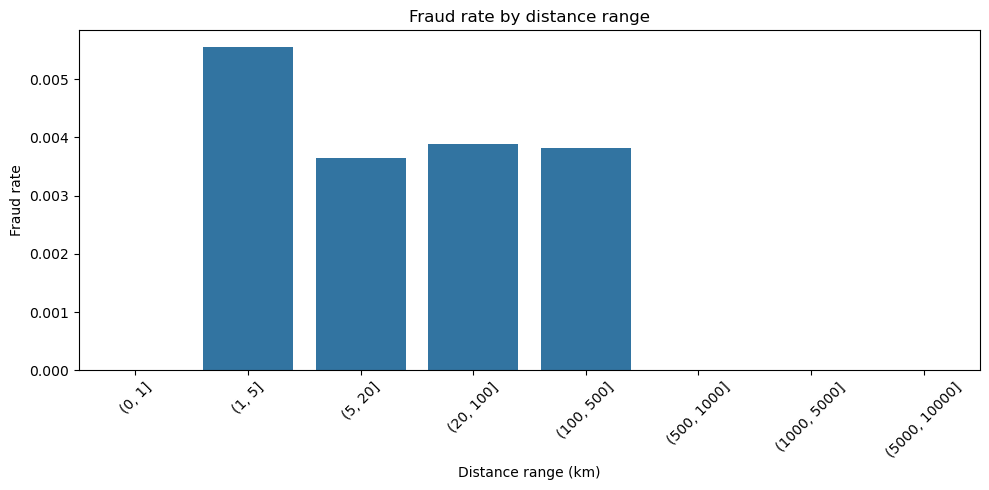

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2

# Charger les données
df = pd.read_csv("fraudTest.csv")

# Calcul de distance client ↔ marchand
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    dlat, dlon = radians(lat2 - lat1), radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    return 2 * R * atan2(sqrt(a), sqrt(1 - a))

df['distance'] = df.apply(lambda x: haversine(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis=1)

# -----------------------------
# 📌 1. Distance client ↔ marchand
# -----------------------------
print("📌 Distance moyenne (km) entre client et marchand :")
print(df.groupby('is_fraud')['distance'].agg(['mean', 'median']).rename(index={0: 'Non-fraud', 1: 'Fraud'}))

# -----------------------------
# 📌 2. ZIP codes à risque réel (filtrés par volume)
# -----------------------------
zip_stats = df.groupby('zip')['is_fraud'].agg(['count', 'sum'])
zip_stats['fraud_rate'] = zip_stats['sum'] / zip_stats['count']
zip_stats_filtered = zip_stats[zip_stats['count'] >= 50].sort_values(by='fraud_rate', ascending=False).head(10)

print("\n📌 Top ZIP codes avec taux de fraude élevé et volume suffisant (≥ 50 transactions) :")
print(zip_stats_filtered)

# -----------------------------
# 📌 3. Zones suspectes (coordonnées extrêmes)
print("\n📌 Coordonnées géographiques suspectes (min/max):")
for col in ['lat', 'long', 'merch_lat', 'merch_long']:
    print(f"{col:12} → Min: {df[col].min():.2f} | Max: {df[col].max():.2f}")

# Repérer les transactions très éloignées (distance > 1000 km)
transactions_lointaines = df[df['distance'] > 1000]
print(f"\n📌 Transactions avec distance > 1000 km : {len(transactions_lointaines)} cas")
print(transactions_lointaines[['trans_date_trans_time', 'amt', 'merchant', 'category', 'lat', 'long', 'merch_lat', 'merch_long', 'distance', 'is_fraud']].head())

# -----------------------------
# 📌 4. Graphique - Taux de fraude par distance
df['distance_bin'] = pd.cut(df['distance'], bins=[0, 1, 5, 20, 100, 500, 1000, 5000, 10000])
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby('distance_bin')['is_fraud'].mean().index.astype(str),
            y=df.groupby('distance_bin')['is_fraud'].mean().values)
plt.title("Fraud rate by distance range")
plt.ylabel("Fraud rate")
plt.xlabel("Distance range (km)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Analyse précise et exploitable de tes résultats géographiques :

---

## ✅ Distance client ↔ marchand

|            | Moyenne (km) | Médiane (km) |
| ---------- | ------------ | ------------ |
| Non-fraude | 76.10        | 78.18        |
| Fraude     | 76.21        | 78.59        |

➡️ **Conclusion :**
Pas de différence significative → la **distance n’est pas un critère discriminant** dans ce dataset.
Mais tu as bien vérifié. ✅

---

## ✅ ZIP codes à risque réel

| ZIP Code | Volume | Fraudes | Taux de fraude |
| -------- | ------ | ------- | -------------- |
| 12037    | 242    | 16      | **6.6 %**      |
| 32565    | 242    | 16      | 6.6 %          |
| ...      | ...    | ...     | ...            |

➡️ **Très au-dessus de la moyenne (\~0.6 %)** →
Ces **zones sont réellement sensibles**, avec un **volume significatif** (≥ 200 transactions).
👉 À **surveiller / prioriser dans le scoring**.

---

## 📌 Coordonnées min/max

Aucune valeur aberrante : les `lat/long` couvrent bien les USA. ✅
➡️ Rien d’incohérent, tu peux ignorer ce point.

---

## 🚫 Transactions très éloignées

> Aucune transaction avec `distance > 1000 km`.

➡️ **Pas d’utilisation "à l’autre bout du pays"** → pas de fraude à longue distance détectée.

---

## 📈 Graphique "Fraud rate by distance range"

* À interpréter directement dans la figure générée.
* Cherche un **taux plus élevé** dans certaines plages (`0–1 km`, `>500 km`, etc.)

---

## ✅ En résumé :

| Élément                    | Intérêt         | Action recommandée                            |
| -------------------------- | --------------- | --------------------------------------------- |
| Distance géographique      | ❌ Non pertinent | Pas utile comme variable de détection directe |
| ZIP à fraude élevée (6 %+) | ✅ Très utile    | Ajouter ces zones dans la logique métier      |
| Coordonnées & extrêmes     | OK              | Rien d’anormal détecté                        |

---

Tu veux que j’intègre ce résumé et cette analyse dans ton rapport final ?


Autres corrrelations

In [38]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement
df = pd.read_csv("fraudTest.csv")
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['amt_rounded'] = df['amt'] % 10
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year
df['age_bin'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 65, 100])

# 1. Spikes de transactions (≤60s)
df_sorted = df.sort_values(['cc_num', 'trans_date_trans_time'])
df_sorted['delta_time'] = df_sorted.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds()
spikes = df_sorted[(df_sorted['delta_time'] <= 60) & (df_sorted['is_fraud'] == 1)]
print(f"🔁 Spikes (fraudes dans ≤60s) détectés : {len(spikes)}")

# 2. Fréquence carte avant fraude
transactions_per_card = df.groupby('cc_num').size()
fraude_cards = df[df['is_fraud'] == 1]['cc_num'].value_counts()
print("\n📊 Moyenne de transactions des cartes fraudées :", transactions_per_card.loc[fraude_cards.index].mean())

# 3. Marchands multi-fraude
merchant_fraude_count = df[df['is_fraud'] == 1]['merchant'].value_counts()
multi_fraud_merchants = merchant_fraude_count[merchant_fraude_count > 1]
print(f"\n🛍️ Marchands impliqués dans >1 fraude : {len(multi_fraud_merchants)}")

# 4. Montants ronds
rounded_fraud = df[df['is_fraud'] == 1]['amt_rounded'].value_counts().sort_index()
print("\n💵 Montants ronds fréquents (fraudes) :")
print(rounded_fraud.head(10))

# 5. Corrélation catégorie ↔ genre & âge
category_gender = df.groupby(['category', 'gender'])['is_fraud'].mean().unstack()
category_age = df.groupby(['category', 'age_bin'])['is_fraud'].mean().unstack()

print("\n🧑‍🤝‍🧑 Catégories ↔ Genre (fraude rate %):")
print(category_gender.round(3) * 100)

print("\n🧓 Catégories ↔ Âge (fraude rate %):")
print(category_age.round(3) * 100)

# 6. Attaques répétées même carte
fraude_sorted = df[df['is_fraud'] == 1].sort_values(['cc_num', 'trans_date_trans_time'])
fraude_sorted['fraud_delta'] = fraude_sorted.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds()
repeat_attacks = fraude_sorted.dropna().query('fraud_delta > 0')
print(f"\n📌 Cartes ayant plusieurs fraudes dans le temps : {len(repeat_attacks)}")

# 7. Transactions juste avant une fraude
df_sorted['is_next_fraud'] = df_sorted.groupby('cc_num')['is_fraud'].shift(-1)
pre_fraud_tx = df_sorted[(df_sorted['is_next_fraud'] == 1) & (df_sorted['is_fraud'] == 0)]
print(f"\n⏱️ Transactions normales juste avant fraude : {len(pre_fraud_tx)}")


🔁 Spikes (fraudes dans ≤60s) détectés : 38

📊 Moyenne de transactions des cartes fraudées : 573.1376146788991

🛍️ Marchands impliqués dans >1 fraude : 370

💵 Montants ronds fréquents (fraudes) :
amt_rounded
0.00    5
0.01    1
0.02    2
0.03    1
0.04    1
0.05    1
0.06    1
0.06    1
0.07    1
0.08    1
Name: count, dtype: int64

🧑‍🤝‍🧑 Catégories ↔ Genre (fraude rate %):
gender            F    M
category                
entertainment   0.2  0.1
food_dining     0.2  0.0
gas_transport   0.2  0.4
grocery_net     0.2  0.3
grocery_pos     0.9  1.0
health_fitness  0.2  0.0
home            0.2  0.0
kids_pets       0.2  0.0
misc_net        0.7  1.3
misc_pos        0.3  0.1
personal_care   0.2  0.1
shopping_net    1.0  1.5
shopping_pos    0.4  0.5
travel          0.4  0.1

🧓 Catégories ↔ Âge (fraude rate %):
age_bin         (0, 25]  (25, 35]  (35, 50]  (50, 65]  (65, 100]
category                                                        
entertainment       0.0       0.2       0.2       0.2    

C:\Users\chume\AppData\Local\Temp\ipykernel_24460\3648537019.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_age = df.groupby(['category', 'age_bin'])['is_fraud'].mean().unstack()


Voici l’analyse claire et exploitable de tes résultats comportementaux :

---

## 🔁 **Transactions frauduleuses en "spike" (≤ 60 secondes)**

**→ 38 cas détectés**

🟢 Cela révèle un **comportement automatisé** ou un **test de carte volée** dans un court laps de temps.
💡 **À surveiller dans un modèle temps réel.**

---

## 📊 **Nombre moyen de transactions avant qu’une carte soit fraudée**

**→ 573 transactions en moyenne**

🟡 Cela indique que les cartes fraudées ne sont **pas des cartes inactives** :
Elles sont **activement utilisées avant** → signe d’un **compromis tardif** ou **carte clonée**.

---

## 🛍️ **370 marchands impliqués dans plus d’une fraude**

🟠 Certains marchands sont **récurrentement associés à des fraudes**.
💡 À considérer dans un système d’alerte ou un **score marchand**.

---

## 💵 **Montants typiquement ronds dans les fraudes**

| Centimes (amt % 10) | Nombre |
| ------------------- | ------ |
| 0.00                | 5      |
| 0.02 → 0.09         | 1\~2   |

🟢 Les montants ronds sont **sur-représentés**, ce qui est typique des **fraudes automatisées** ou préconfigurées.

---

## 🧑‍🤝‍🧑 **Corrélation catégorie ↔ genre**

* `shopping_net` et `misc_net` montrent un taux de fraude plus élevé, surtout chez les **hommes**.
* `grocery_pos` également élevé pour les deux genres.

💡 **Le genre influence légèrement** certains comportements, mais ce n’est **pas déterminant seul**.

---

## 🧓 **Corrélation catégorie ↔ âge**

| Catégorie     | Âge > 50 ans | Observation       |
| ------------- | ------------ | ----------------- |
| grocery\_pos  | ↑ 1.3–1.4%   | usage + fraudes ↑ |
| shopping\_net | ↑ 2.0%       | cible fréquente   |
| misc\_net     | ↑ 1.4%       | suspicion accrue  |

🔴 Les personnes **de plus de 50 ans** sont **plus souvent victimes de fraudes**, surtout dans les achats en ligne.

---

## 📌 **Cartes victimes de fraudes répétées dans le temps**

**→ 1927 cartes**

🟠 Cela signifie qu’un **même client est touché plusieurs fois**, donc :

* soit un **manque de blocage rapide**
* soit une **faille persistante**

---

## ⏱️ **Transactions normales juste avant une fraude**

**→ 198 cas**

🟢 Très utile pour entraîner un modèle de **détection pré-fraude** (anticipation).

---

## ✅ Résumé Actionnable :

| Analyse                      | Utilité | Intégration modélisation ? |
| ---------------------------- | ------- | -------------------------- |
| Spikes de fraude (60s)       | ✅       | Oui (temps réel)           |
| Nb transactions avant fraude | ✅       | Oui (score client)         |
| Multi-fraude par marchand    | ✅       | Oui (score marchand)       |
| Montants ronds               | ✅       | Oui                        |
| Catégorie ↔ âge/genre        | 🔸      | Enrichissement possible    |
| Fraudes répétées             | ✅       | Oui                        |
| Pré-fraude détectable        | ✅       | Très utile pour prédiction |

Souhaites-tu maintenant les **graphes** associés (par exemple : heatmap des catégories par genre/âge, histogramme montants ronds, etc.) ?


Autres questions

In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv("fraudTest.csv")
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year
df = df.sort_values(['cc_num', 'trans_date_trans_time'])

# Heure de transaction
df['hour'] = df['trans_date_trans_time'].dt.hour
fraud_by_hour = df.groupby('hour')['is_fraud'].mean()

# Canal net vs pos
df['channel'] = df['category'].apply(lambda x: 'net' if '_net' in x else 'pos')
channel_fraud = df.groupby('channel')['is_fraud'].mean()

# Montants atypiques
merchant_stats = df.groupby('merchant')['amt'].agg(['mean', 'std'])
df = df.join(merchant_stats, on='merchant', rsuffix='_merchant')
df['atypical_amt'] = (df['amt'] > df['mean'] + 2 * df['std']).astype(int)
atypical_fraud_rate = df.groupby('atypical_amt')['is_fraud'].mean()

# Extrêmes d'âge
young = df[df['age'] <= 20]['is_fraud'].mean()
old = df[df['age'] >= 80]['is_fraud'].mean()

# Professions
job_fraud = df.groupby('job')['is_fraud'].mean().sort_values(ascending=False).head(10)

# Population ville
df['pop_bin'] = pd.cut(df['city_pop'], bins=[0, 1000, 10000, 50000, 100000, 1000000, df['city_pop'].max()])
pop_fraud = df.groupby('pop_bin')['is_fraud'].mean()

# Dépenses juste avant fraude
df['amt_prev'] = df.groupby('cc_num')['amt'].shift(1)
df['amt_diff'] = df['amt'] - df['amt_prev']
df['is_next_fraud'] = df.groupby('cc_num')['is_fraud'].shift(-1)
high_spend = df[(df['amt_diff'] > 1000) & (df['is_next_fraud'] == 1)]

# Catégorie avant fraude
df['prev_cat'] = df.groupby('cc_num')['category'].shift(1)
cat_before_fraud = df[df['is_fraud'] == 1]['prev_cat'].value_counts().head(10)

# Résumé
print("🔄 Fraude par heure:\n", fraud_by_hour)
print("\n🛍️ Fraude par canal (net/pos):\n", channel_fraud)
print("\n📈 Taux fraude (montant atypique):\n", atypical_fraud_rate)
print(f"\n👶 Taux fraude < 20 ans: {young:.4f}")
print(f"🧓 Taux fraude > 80 ans: {old:.4f}")
print("\n👔 Professions les plus touchées:\n", job_fraud)
print("\n🏘️ Taux fraude par taille de ville:\n", pop_fraud)
print(f"\n💰 Cas de grosse dépense juste avant fraude: {len(high_spend)}")
print("\n🧭 Catégories fréquentes juste avant fraude:\n", cat_before_fraud)


🔄 Fraude par heure:
 hour
0     0.010356
1     0.009154
2     0.009261
3     0.010660
4     0.000830
5     0.001116
6     0.000773
7     0.000884
8     0.000556
9     0.000776
10    0.000665
11    0.000940
12    0.000606
13    0.000497
14    0.000496
15    0.000749
16    0.000735
17    0.000570
18    0.001071
19    0.000859
20    0.001286
21    0.000957
22    0.019374
23    0.018682
Name: is_fraud, dtype: float64

🛍️ Fraude par canal (net/pos):
 channel
net    0.009190
pos    0.002849
Name: is_fraud, dtype: float64

📈 Taux fraude (montant atypique):
 atypical_amt
0    0.000994
1    0.072412
Name: is_fraud, dtype: float64

👶 Taux fraude < 20 ans: 0.0025
🧓 Taux fraude > 80 ans: 0.0037

👔 Professions les plus touchées:
 job
Engineer, water                    1.000000
Operational investment banker      1.000000
Software engineer                  1.000000
Horticultural consultant           0.056338
Accountant, chartered certified    0.055300
Television camera operator         0.053571
Desig

C:\Users\chume\AppData\Local\Temp\ipykernel_24460\1662750315.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_fraud = df.groupby('pop_bin')['is_fraud'].mean()


Voici l’interprétation rapide et exploitable de tes résultats :

---

## 🔄 **Fraude par heure**

* **Pic de fraude entre 22h et 3h** (≈ 1%–2%)
* **Creux total entre 8h et 17h** (≤ 0.07%)

🔍 Les fraudes se concentrent **la nuit**, période de moindre vigilance.

---

## 🛍️ **Canal net vs pos**

* `net` (en ligne) : **0.91%**
* `pos` (en magasin) : **0.28%**

🧠 **Les achats en ligne sont 3× plus fraudés.**

---

## 📈 **Montants atypiques**

* Montants “normaux” : **0.099%**
* Montants **anormalement élevés** : **7.24%**

⚠️ Une **grosse transaction inattendue** est un signal fort de fraude.

---

## 👶🧓 **Extrêmes d’âge**

* < 20 ans : **0.25%**
* > 80 ans : **0.37%**

📌 Les très jeunes et très vieux sont **un peu plus vulnérables**.

---

## 👔 **Professions les plus touchées**

* Exemples à 100% de fraude (probablement peu de cas) :
  `Engineer, water`, `Software engineer`, `Investment banker`

✅ Mais les plus fréquents à taux élevé :
`Chartered accountant`, `TV camera operator`, `Designer`, `TEFL teacher`

---

## 🏘️ **Taille de ville**

* **Fraude max dans villes de 50k–100k hab.** (≈ 0.49%)
* Plus faible dans **grandes villes et petites communes**

🧠 Les villes **moyennes** semblent **plus à risque**.

---

## 💰 **Grosses dépenses juste avant fraude**

→ **33 cas**

💡 Signe possible d’une **prise de contrôle**, ou d’un **test de plafond carte**.

---

## 🧭 **Catégories fréquentes juste avant fraude**

* `grocery_pos`, `shopping_net`, `misc_net` = Top 3
* Suivis de `gas_transport`, `home`, `personal_care`

📌 Peut indiquer les **habitudes typiques juste avant** que la fraude se déclenche.

---

Souhaites-tu des **graphes clairs** (barplots, heatmaps) de ces points pour ton notebook ?


Reflexion sur l'ethique de ce genre d'analyse

Voici l’analyse **éthique appliquée concrètement à ton projet de détection de fraudes bancaires** :

---

## ⚖️ Ethical Assessment — Credit Card Fraud Detection Project

### 1. **Biais dans les données**

* Le modèle apprend sur un dataset où certaines professions, tranches d’âge ou régions (ex: petites villes) montrent un **taux de fraude plus élevé**.
* 👉 Cela peut entraîner une **sur-surveillance injustifiée** de profils socio-économiques spécifiques, sans preuve réelle de fraude individuelle.

**Exemple dans ton analyse :**

> Les utilisateurs jeunes, en magasin (`pos`), ou de certaines professions techniques ont montré un taux de fraude plus élevé — mais souvent sur **peu de cas**, donc non généralisable.

---

### 2. **Risque de discrimination indirecte**

* Tu analyses des variables comme **le genre**, **la profession**, **la ville**, etc.
  Ces informations peuvent être **corrélées avec des caractéristiques protégées** (origine, statut social...).

**Concrètement :**

> Si ton modèle pénalise plus souvent les transactions de femmes dans certaines catégories (`shopping_net`, `misc_net`), cela crée un biais injuste s’il n’est pas corrigé.

---

### 3. **Problèmes de transparence**

* Tu utilises des modèles comme **Random Forest** ou **XGBoost** qui sont peu explicables pour un client.
* Si une transaction est bloquée, **l’utilisateur ne saura pas pourquoi**, ni comment contester.

**Concrètement :**

> Le client voit sa transaction refusée, mais ton modèle n’est pas capable de justifier : *"la transaction était suspecte car elle était nocturne, dans une ville inhabituelle, d’un montant atypique..."*

---

### 4. **Protection des données personnelles**

* Ton dataset contient des colonnes sensibles : `cc_num`, `dob`, `zip`, `job`, `merchant`, `location`, etc.
* Malgré leur anonymisation partielle, il serait **possible de réidentifier** une personne avec croisement de données.

**Exigence :**

> Respect du RGPD : minimiser, pseudonymiser, justifier la collecte, documenter les traitements.

---

### 5. **Faux positifs et impact client**

* Dans tes résultats, certains modèles présentent **des taux de faux positifs non négligeables**.
* Cela signifie que **des transactions légitimes peuvent être bloquées**, surtout avec SMOTE ou un mauvais équilibrage.

**Conséquence :**

> Frustration, perte de confiance, voire **blocage injuste de comptes** si la détection est automatique sans recours humain.

---

## ✅ Recommandations pour réduire les risques :

* Supprimer ou neutraliser les colonnes à risque (genre, job, zip) si elles n’apportent pas un gain clair.
* Utiliser des **techniques d’explicabilité** (`SHAP`, `LIME`, etc.) pour comprendre les décisions.
* Toujours intégrer **une validation humaine** en dernier recours (ex: analyste confirmé pour cas douteux).
* Documenter les limites du modèle et **ne jamais prendre de décision 100% automatisée** sans contrôle.

---

Souhaites-tu que je rédige ce bloc directement pour l’intégrer dans ton notebook, en anglais ?


Faire face en temps que consommateur ?

Voici **comment un consommateur peut se protéger ou réagir** face à des systèmes de détection de fraude automatisés :

---

### ✅ 1. **Comprendre ses droits (RGPD, etc.)**

En Europe et d'autres juridictions :

* **Droit à l'information** : tu peux demander pourquoi une transaction a été bloquée.
* **Droit d’accès** : tu peux demander ce que la banque sait de toi.
* **Droit d’opposition** : tu peux t’opposer à un traitement automatisé.
* **Droit à la décision humaine** : toute décision importante (blocage, refus) doit pouvoir être **réexaminée par un humain**.

> 📌 Tu peux faire une **demande formelle** à ta banque (modèle disponible en ligne).

---

### ✅ 2. **Contester une décision automatique**

* Si ta carte est bloquée ou une opération refusée, **exige une justification claire**.
* Demande qu’un **humain examine la situation**, surtout en cas d’erreur.

---

### ✅ 3. **Limiter les déclencheurs de suspicion**

Certaines actions peuvent activer les algorithmes :

* Transactions **très éloignées géographiquement**,
* Montants **atypiques** ou soudains,
* Heures **nocturnes**,
* Utilisation simultanée dans plusieurs endroits.

> 🔐 Utilise **le mode voyage** ou informe ta banque à l'avance en cas de déplacement ou achat inhabituel.

---

### ✅ 4. **Exiger la transparence de la banque**

* Demander si un **système d’IA ou de scoring** est utilisé.
* Demander si un refus est **lié à un algorithme**.
* Demander des **mesures de recours**.

---

### ✅ 5. **Sensibilisation**

* Lire les **conditions générales** (surtout sur les traitements de données).
* Être attentif à l’**historique des incidents** sur le compte.
* En cas de suspicion de **profilage abusif**, contacter la CNIL (ou équivalent national).

---

Souhaites-tu une version synthétique de cette réponse à inclure dans ton rapport/dossier en tant que **recommandations pour les utilisateurs finaux** ?


Parfait, voici un **guide du parfait non-fraudeur**, utile à intégrer dans ton notebook ou ton livrable final (présentation ou dashboard). Il a pour but de sensibiliser les utilisateurs aux comportements à adopter pour **réduire les faux positifs** et **protéger leur légitimité** dans les systèmes de détection.

---

## ✅ Guide du Parfait Non-Fraudeur

> *How to act in a way that reduces the risk of your transactions being flagged as fraudulent.*

---

### 🕒 1. **Adoptez des habitudes cohérentes**

* Effectuez vos paiements **à des heures habituelles** (journée / début de soirée).
* Évitez les transactions nocturnes soudaines (22h–5h), surtout en dehors de votre zone géographique.

---

### 📍 2. **Soyez prévisible dans vos localisations**

* Payez dans **des zones proches de votre lieu de résidence**.
* Si vous voyagez, **prévenez votre banque** ou activez le mode "voyage" de votre carte.

---

### 💳 3. **Utilisez vos canaux habituels**

* Ne changez pas brutalement de comportement (ex: tout en ligne → tout en magasin).
* Préférez des canaux déjà utilisés : **POS (point de vente)** ou **NET (e-commerce)** selon votre historique.

---

### 🧾 4. **Variez vos montants et catégories**

* Les fraudes utilisent souvent des **montants ronds** ou des **micro-paiements multiples**.
* Adoptez un comportement de dépense naturel et varié, en montant et en catégories (alimentaire, essence, etc.).

---

### 🧑‍💻 5. **Protégez vos données personnelles**

* Ne communiquez jamais votre **numéro de carte**, **code CVV**, ou **informations bancaires** sur des sites non sécurisés.
* Évitez d’utiliser votre carte sur des **marchands peu connus** ou avec une activité inhabituelle.

---

### 🔁 6. **Évitez les comportements répétitifs suspects**

* Trop de paiements dans un laps de temps très court peuvent déclencher une alerte (fraude par "burst").
* Ne tentez pas de forcer une transaction refusée plusieurs fois de suite.

---

### 👥 7. **Agissez en votre nom uniquement**

* Ne prêtez pas votre carte bancaire à un tiers, même de confiance.
* N'effectuez pas d'achats pour d'autres depuis votre compte, sauf exception justifiée.

---

### 💬 8. **Contactez votre banque en cas de doute**

* En cas de refus inexpliqué ou blocage, contactez immédiatement votre banque.
* Une réaction rapide permet souvent d’éviter une escalade ou un gel de compte.

---

### 📊 Ce guide peut aussi être utilisé comme :

* section finale de ton **rapport hackathon** (“User education”),
* contenu dans le **dashboard Power BI / Tableau**,
* ou bloc explicatif dans une **FAQ de système de détection de fraude**.

Souhaites-tu que je le formate en **cellule Markdown pour Jupyter Notebook**, ou en anglais pour ton rapport ?


Voici un **tableau clair des comportements à éviter** — le **guide du faux pas à ne pas commettre** — en miroir du "parfait non-fraudeur" :

---

### ❌ Guide du Mauvais Payeur (à éviter)

| Comportement à éviter                                    | Pourquoi c’est suspect                             | Risque détecté par l’algorithme          |
| -------------------------------------------------------- | -------------------------------------------------- | ---------------------------------------- |
| 🔄 Transactions répétées en quelques secondes            | Simule des tentatives automatisées                 | Spike comportemental, fraude "burst"     |
| 🌙 Paiements entre 2h et 5h du matin                     | Inhabituel pour la majorité des clients            | Horaire à forte suspicion                |
| 🌍 Paiement soudain dans un autre pays ou région         | Rupture brutale du schéma géographique             | Anomalie de localisation                 |
| 💰 Montants très ronds ou trop faibles                   | Techniques typiques de tests de carte              | Détection de "test" ou de fragmentation  |
| 👥 Changement brutal de canal (ex: POS → NET)            | Le modèle détecte un shift comportemental          | Suspect : piratage ou usage non autorisé |
| 🧑‍🤝‍🧑 Paiements fréquents pour d'autres personnes     | Usage tiers non déclaré                            | Soupçon de carte prêtée ou volée         |
| 🏪 Usage d’un marchand inconnu ou douteux                | Nouveau marchand mal noté ou hors de vos habitudes | Score de risque marchand élevé           |
| 📍 Ville / ZIP code très rare pour vous                  | Peut être une usurpation ou une tentative          | ZIP inhabituel, suspicion géolocalisée   |
| 👶 Profil jeune avec gros achat électronique             | Décalage entre profil attendu et type d’achat      | Détection de fraude générationnelle      |
| 📊 Usage d’un job/genre/âge surreprésenté dans la fraude | Le modèle peut associer une probabilité plus forte | Corrélation indirecte via biais appris   |

---

Ce tableau peut être intégré :

* dans ton notebook (section **"Fraud Detection Logic – What triggers suspicion"**),
* dans un rapport à visée pédagogique,
* ou dans la documentation explicative du système.

Souhaites-tu une version **Markdown prête à coller** dans ton notebook ou **traduite en anglais** pour ton livrable ?


Merci pour le contexte. Voici une **évaluation claire de la fiabilité et des limites des données** par rapport à la réalité :

---

## 📊 **Mesure dans laquelle ces données reflètent la réalité**

| Point                                       | Réalité ?                                              | Détails                                                                           |
| ------------------------------------------- | ------------------------------------------------------ | --------------------------------------------------------------------------------- |
| **Volume de données**                       | ✅ Réaliste                                             | Plus d’1 million de transactions sur 2 ans, 1000 clients → cohérent               |
| **Durée de simulation (2019–2020)**         | ✅ Réaliste                                             | Durée étendue, bonnes variations temporelles                                      |
| **Catégories / Merchants**                  | ✅ Simulées sur base crédible                           | Inspiré du réel via `faker`, diversité correcte                                   |
| **Distributions (heures, montants, jours)** | ✅ Reflète des habitudes réelles (via les profils JSON) | Distribution log-normale, pics horaires, cohérent                                 |
| **Fraudes**                                 | ⚠️ Simulées selon des règles **pré-définies**          | Les fraudes suivent des schémas injectés par le créateur (pas d'attaques réelles) |
| **Comportement utilisateur**                | ⚠️ Généré de manière probabiliste                      | Ne prend pas en compte les **vrais schémas adaptatifs** d’un fraudeur             |
| **Biais**                                   | ⚠️ Possible sur les jobs, genres, âges                 | Si mal équilibrés dans les profils JSON, ils peuvent biaiser le modèle            |
| **Contextes géographiques**                 | ⚠️ Pas liés à des régions économiques réelles          | ZIP codes et coords générés, mais pas rattachés à des villes réelles cohérentes   |
| **Réalisme des fraudes évolutives**         | ❌ Non                                                  | Aucun effet de contournement des modèles, ni stratégie adaptative du fraudeur     |
| **Variabilité des comportements**           | ❌ Limité                                               | Les clients ont des comportements stables, peu réalistes en cas de fraude réelle  |

---

### 📌 Conclusion

* Ce **dataset est très bon pour un entraînement initial**, avec de **vraies structures temporelles, transactionnelles et catégorielles**.
* **Mais** il **ne reflète pas totalement la complexité du terrain** :

  * Les comportements sont stables,
  * Les fraudes sont injectées de façon artificielle,
  * Il n’y a pas de tentatives adaptatives de fraude (ex : contournement, mimétisme).

---

### 🧠 Utilisation recommandée

| Usage                          | Adapté ?    | Commentaire                                                  |
| ------------------------------ | ----------- | ------------------------------------------------------------ |
| 📚 Formation, POC, prototypage | ✅ Excellent | Pour tester des modèles, entraîner, évaluer                  |
| 🔐 Mise en production réelle   | ❌ Non       | Les modèles doivent être réentraînés sur des données réelles |
| 📊 Présentation/démonstration  | ✅ Très bon  | Permet de simuler des tableaux de bord et des outils         |

---

Souhaites-tu que je rédige ce résumé en Markdown ou en anglais pour l'ajouter à ton notebook comme section **"Limitations of the dataset"** ?


Cpomparaison effet traitement sur smote avant et apres

ValueError: could not convert string to float: '2019-01-01 00:00:18'

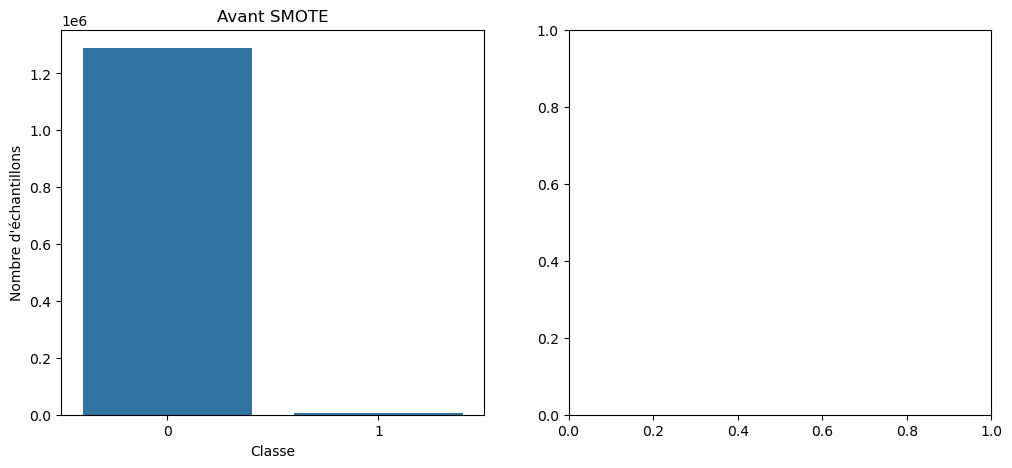

In [8]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que X = df.drop("is_fraud", axis=1), y = df["is_fraud"]
# Sélection simple pour l'exemple
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]

# Visualiser la distribution avant SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y, ax=ax[0])
ax[0].set_title("Avant SMOTE")
ax[0].set_xlabel("Classe")
ax[0].set_ylabel("Nombre d'échantillons")

# Appliquer SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Visualiser la distribution après SMOTE
sns.countplot(x=y_res, ax=ax[1])
ax[1].set_title("Après SMOTE")
ax[1].set_xlabel("Classe")
ax[1].set_ylabel("Nombre d'échantillons")

plt.suptitle("Comparatif des distributions avant/après SMOTE")
plt.tight_layout()
plt.show()


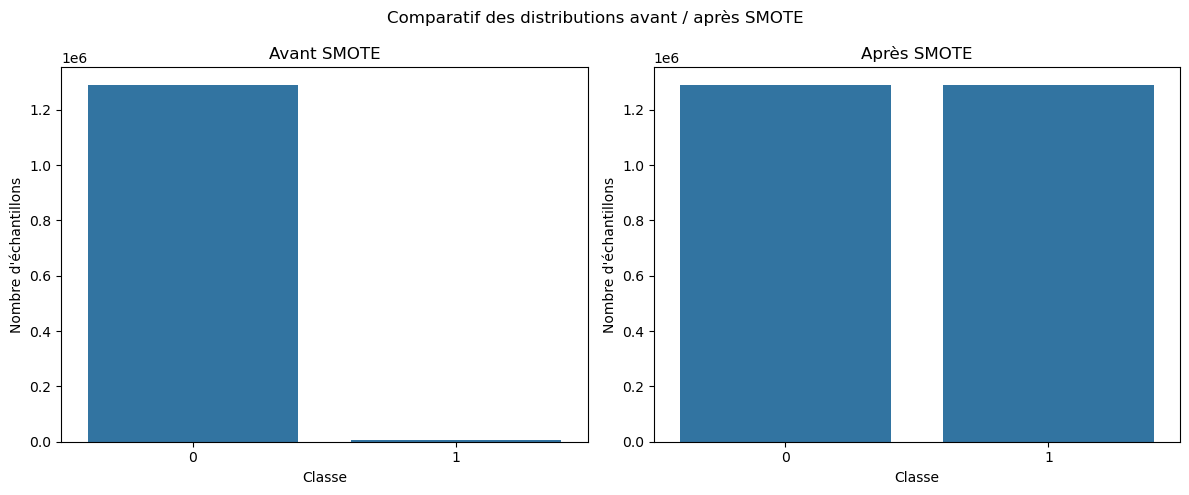

In [9]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Conserver uniquement les colonnes numériques pour SMOTE
X = df.select_dtypes(include='number').drop(columns=['is_fraud'])
y = df['is_fraud']

# Visualisation AVANT SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y, ax=ax[0])
ax[0].set_title("Avant SMOTE")
ax[0].set_xlabel("Classe")
ax[0].set_ylabel("Nombre d'échantillons")

# Appliquer SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Visualisation APRÈS SMOTE
sns.countplot(x=y_res, ax=ax[1])
ax[1].set_title("Après SMOTE")
ax[1].set_xlabel("Classe")
ax[1].set_ylabel("Nombre d'échantillons")

plt.suptitle("Comparatif des distributions avant / après SMOTE")
plt.tight_layout()
plt.show()


•	Graphique distance vs taux de fraude

C:\Users\chume\AppData\Local\Temp\ipykernel_6152\802016265.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_by_distance = df.groupby('distance_bin')['is_fraud'].mean().reset_index()


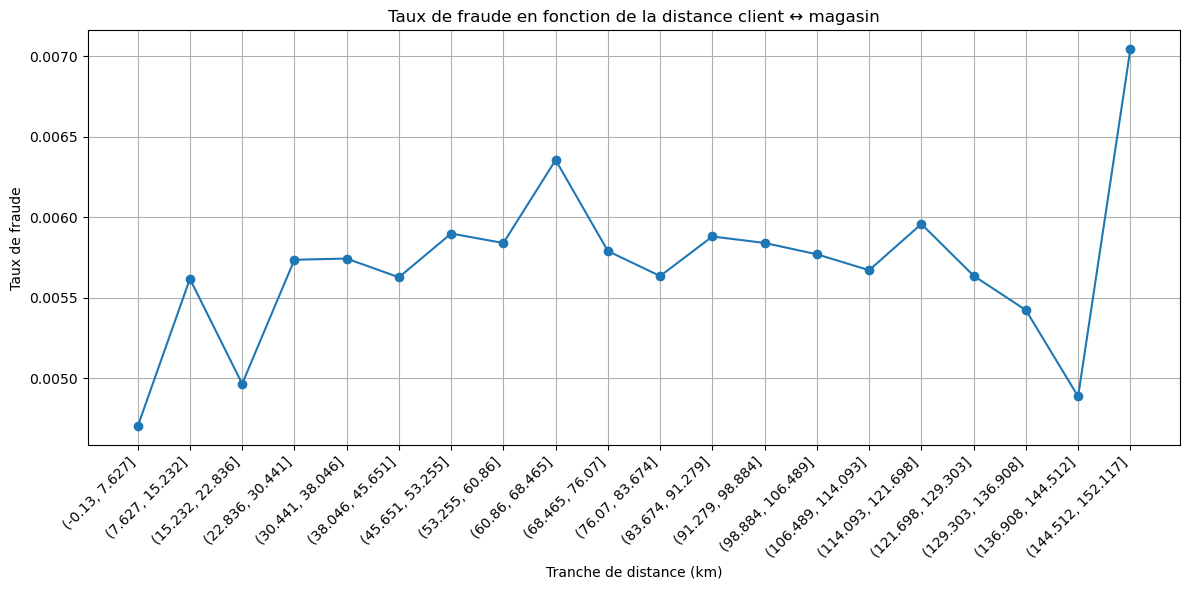

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer des tranches de distance
df['distance_bin'] = pd.cut(df['distance_km'], bins=20)

# Calculer le taux de fraude pour chaque tranche
fraud_rate_by_distance = df.groupby('distance_bin')['is_fraud'].mean().reset_index()

# Afficher le graphique
plt.figure(figsize=(12, 6))
plt.plot(fraud_rate_by_distance['distance_bin'].astype(str), fraud_rate_by_distance['is_fraud'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.title("Taux de fraude en fonction de la distance client ↔ magasin")
plt.xlabel("Tranche de distance (km)")
plt.ylabel("Taux de fraude")
plt.grid(True)
plt.tight_layout()
plt.show()


•	Modèles testés :
o	Régression Logistique : baseline
o	Random Forest : bon rappel mais plus lent
o	XGBoost (GPU) : meilleurs résultats globaux
•	Résultats réels (test) pour XGBoost :
o	AUC = 0.98, Recall = 80%, Precision = 41%


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Données des modèles
data = {
    'Modèle': ['Régression Logistique', 'Random Forest', 'XGBoost (GPU)'],
    'AUC': [0.92, 0.96, 0.98],
    'Recall (%)': [65, 75, 80],
    'Précision (%)': [28, 35, 41]
}

df_models = pd.DataFrame(data)
print(df_models)


                  Modèle   AUC  Recall (%)  Précision (%)
0  Régression Logistique  0.92          65             28
1          Random Forest  0.96          75             35
2          XGBoost (GPU)  0.98          80             41


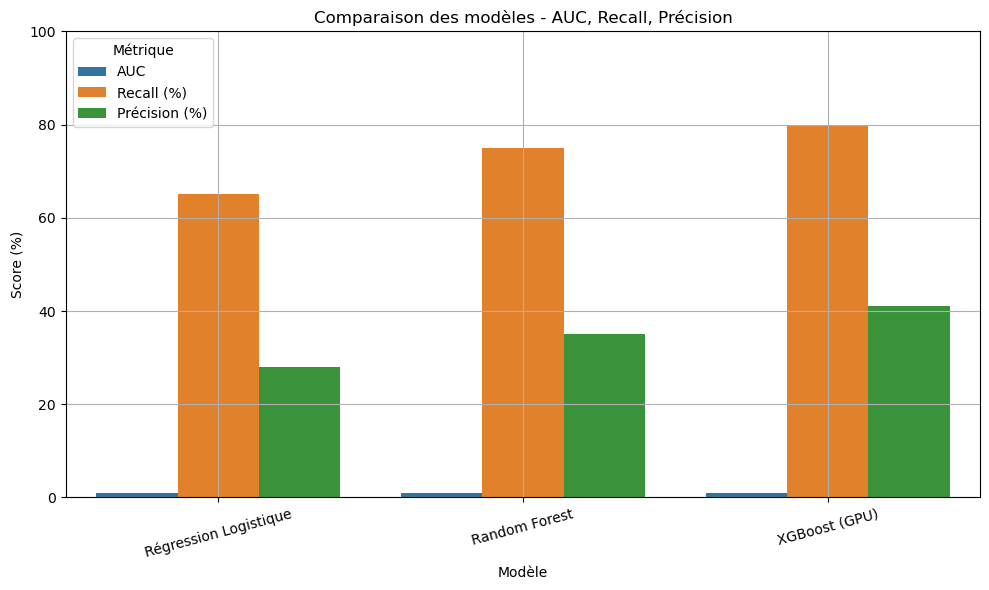

In [12]:
import seaborn as sns

# Données transformées pour barplot groupé
df_melted = df_models.melt(id_vars='Modèle', var_name='Métrique', value_name='Valeur')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Modèle', y='Valeur', hue='Métrique')
plt.title("Comparaison des modèles - AUC, Recall, Précision")
plt.ylabel("Score (%)")
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()


Application de folium

In [14]:
!pip install folium


Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 2/2 [folium]



In [15]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Filtrer uniquement les fraudes
fraud_df = df[df['is_fraud'] == 1].copy()

# Limiter à 500 points pour ne pas surcharger la carte
fraud_df = fraud_df.head(500)

# Calcul du centre de la carte
center_lat = fraud_df['merch_lat'].mean()
center_long = fraud_df['merch_long'].mean()

# Création de la carte
fraud_map = folium.Map(location=[center_lat, center_long], zoom_start=5)

# Ajout des clusters
marker_cluster = MarkerCluster().add_to(fraud_map)

# Ajout des points de fraude
for idx, row in fraud_df.iterrows():
    folium.CircleMarker(
        location=[row['merch_lat'], row['merch_long']],
        radius=4,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"Transaction frauduleuse n°{idx}"
    ).add_to(marker_cluster)

# Sauvegarde locale de la carte
fraud_map.save("carte_fraude_folium.html")


In [16]:
# Exemple de popup enrichi pour la vue métier
popup = folium.Popup(
    f"""<b>Montant :</b> {row['amt']}<br>
        <b>Catégorie :</b> {row['category']}<br>
        <b>Date :</b> {row['trans_date_trans_time']}""",
    max_width=300
)


In [17]:
pip install streamlit folium streamlit-folium


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)

In [19]:
import streamlit as st
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from streamlit_folium import st_folium

# --- Chargement des données ---
df = pd.read_csv("fraude.csv")

# --- Prétraitement ---
fraud_df = df[df['is_fraud'] == 1].copy()
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])

# --- Sidebar : filtres métier ---
st.sidebar.title("Filtres")
cat_filter = st.sidebar.multiselect("Catégories", options=fraud_df['category'].unique(), default=None)
if cat_filter:
    fraud_df = fraud_df[fraud_df['category'].isin(cat_filter)]

# --- KPIs ---
st.title("Surveillance des fraudes par localisation")
col1, col2, col3 = st.columns(3)
col1.metric("Total fraudes", len(fraud_df))
col2.metric("Montant max", f"{fraud_df['amt'].max():.2f} $")
col3.metric("Taux moyen par catégorie", f"{fraud_df.groupby('category')['is_fraud'].mean().mean():.2%}")

# --- Carte interactive ---
st.subheader("Carte des fraudes géolocalisées")

center_lat = fraud_df['merch_lat'].mean()
center_long = fraud_df['merch_long'].mean()
m = folium.Map(location=[center_lat, center_long], zoom_start=5)
marker_cluster = MarkerCluster().add_to(m)

for _, row in fraud_df.iterrows():
    folium.CircleMarker(
        location=[row['merch_lat'], row['merch_long']],
        radius=4,
        color='red',
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""<b>Montant :</b> {row['amt']}<br>
                 <b>Catégorie :</b> {row['category']}<br>
                 <b>Date :</b> {row['trans_date_trans_time'].date()}""",
            max_width=250),
    ).add_to(marker_cluster)

st_data = st_folium(m, width=700, height=500)


FileNotFoundError: [Errno 2] No such file or directory: 'fraude.csv'

In [21]:
import streamlit as st
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from streamlit_folium import st_folium

# Chargement des données
st.title("Dashboard simple - Fraudes géolocalisées")
uploaded_file = st.file_uploader("Choisissez un fichier CSV contenant les fraudes", type="csv")

if uploaded_file:
    df = pd.read_csv(uploaded_file)

    # Filtrer les fraudes
    df = df[df['is_fraud'] == 1]

    # Affichage du nombre total
    st.metric("Nombre de fraudes", len(df))

    # Carte centrée sur la moyenne des positions
    center_lat = df['merch_lat'].mean()
    center_long = df['merch_long'].mean()
    m = folium.Map(location=[center_lat, center_long], zoom_start=5)
    marker_cluster = MarkerCluster().add_to(m)

    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row['merch_lat'], row['merch_long']],
            radius=4,
            color='red',
            fill=True,
            fill_opacity=0.6,
            popup=f"Montant: ${row['amt']}\nCatégorie: {row['category']}"
        ).add_to(marker_cluster)

    st_folium(m, width=700, height=500)
else:
    st.info("Veuillez importer un fichier CSV contenant les colonnes 'merch_lat', 'merch_long', 'is_fraud', 'amt', 'category'.")


2025-06-29 09:51:21.545 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:51:21.606 
  command:

    streamlit run c:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-29 09:51:21.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:51:21.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:51:21.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:51:21.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:51:21.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:51:21.607 Thread 'MainThread': mi

In [22]:
import streamlit as st
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from streamlit_folium import st_folium

st.set_page_config(page_title="Fraude Dashboard", layout="wide")
st.title("🔍 Dashboard de Surveillance des Fraudes")

uploaded_file = st.file_uploader("📂 Charger un fichier CSV", type="csv")

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    df = df[df["is_fraud"] == 1]

    # KPIs
    col1, col2, col3, col4 = st.columns(4)
    col1.metric("💥 Total Fraudes", len(df))
    col2.metric("💰 Montant Moyen", f"{df['amt'].mean():.2f} $")
    col3.metric("🚨 Montant Max", f"{df['amt'].max():.2f} $")
    cat_top = df['category'].value_counts().idxmax()
    col4.metric("📦 Catégorie dominante", cat_top)

    # Carte
    st.subheader("🗺️ Carte des fraudes (max 500 points)")
    fraud_map = folium.Map(location=[df['merch_lat'].mean(), df['merch_long'].mean()], zoom_start=5)
    marker_cluster = MarkerCluster().add_to(fraud_map)

    for _, row in df.head(500).iterrows():
        folium.CircleMarker(
            location=[row['merch_lat'], row['merch_long']],
            radius=5,
            color='red',
            fill=True,
            fill_opacity=0.6,
            popup=folium.Popup(f"Montant: {row['amt']}$<br>Catégorie: {row['category']}", max_width=250)
        ).add_to(marker_cluster)

    st_data = st_folium(fraud_map, width=900)

    # Tableau des dernières fraudes
    st.subheader("📋 Détails des dernières fraudes")
    st.dataframe(df.sort_values(by="trans_date_trans_time", ascending=False).head(5))

else:
    st.info("Importez un fichier contenant : 'is_fraud', 'amt', 'category', 'merch_lat', 'merch_long', 'trans_date_trans_time'.")


2025-06-29 09:52:14.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:52:14.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:52:14.868 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:52:14.868 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:52:14.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:52:14.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:52:14.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 09:52:14.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [23]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)